# Model Prediksi AQI Index Sebagai Solusi Kebijakan Smart City di Wilayah Asia Timur dan Asia Tenggara

## Tim Statmat @National Data Science Competition Fortex 5.0 by HMIF UAI

### Anggota:
- **Siti Nur Salamah**  
  Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Indonesia  
  Depok, Jawa Barat  
  [siti.nur26@ui.ac.id](mailto:siti.nur26@ui.ac.id)

- **Maryesta Apriliani Sihombing**  
  Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Indonesia  
  Depok, Jawa Barat  
  [maryesta.apriliani@ui.ac.id](mailto:maryesta.apriliani@ui.ac.id)

- **Raissa Anggia Maharani**  
  Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Indonesia  
  Depok, Jawa Barat  
  [raissa.anggia@ui.ac.id](mailto:raissa.anggia@ui.ac.id)


# Import Module

In [ ]:
!pip install catboost dash shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
import dash
from dash import dcc, html
import plotly.express as px
import random
import shap

pd.set_option('display.max_columns', None)

# Import Data

In [ ]:
!gdown 1HO--TsALdoNabjuFmNovjNgtri8eFKn5

Downloading...
From: https://drive.google.com/uc?id=1HO--TsALdoNabjuFmNovjNgtri8eFKn5
To: /content/environmental_dataset.csv
100% 1.47M/1.47M [00:00<00:00, 35.8MB/s]


In [ ]:
df = pd.read_csv('environmental_dataset.csv')
df

SensorID   SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
0     S000001  Industrial Area                 71.990               101.550   
1     S000002  Industrial Area                 69.960                16.710   
2     S000003            Rural                 78.135               100.404   
3     S000004  Industrial Area                 79.640               128.900   
4     S000005  Industrial Area                 63.350               296.260   
...       ...              ...                    ...                   ...   
9853  S009854            Rural                 34.835                54.402   
9854  S009855  Industrial Area                 26.520               177.970   
9855  S009856            Urban                 87.760               134.600   
9856  S009857  Industrial Area                161.320               337.790   
9857  S009858  Industrial Area                141.560               323.970   

      Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  \
0              183.240             65.920            30.810   
1               40.990            123.300             4.120   
2               30.016             55.270            23.650   
3               29.500            130.680             9.100   
4               76.560             52.040            29.870   
...                ...                ...               ...   
9853            17.731             69.015            10.265   
9854           184.010            125.360            16.110   
9855           134.060             99.420            25.120   
9856           149.200            133.240             0.990   
9857            36.920            106.610            42.400   

      Pollutant_SO2_ppb  UrbanVegetationArea_m2  Humidity_%  AirTemperature_C  \
0                33.040                  750.58       42.68             27.46   
1                26.440                  982.93       62.27             -6.66   
2                 6.564                 8780.38       78.95             -9.08   
3                28.580                     NaN       36.55             13.87   
4                44.110                  917.23       41.13              4.85   
...                 ...                     ...         ...               ...   
9853             19.300                 5136.89       65.19             24.72   
9854             80.080                  996.55       64.20             14.89   
9855             95.060                 1328.34       60.68             -4.26   
9856              9.300                     NaN       55.19             -8.27   
9857             13.270                  770.97       63.49             28.46   

     EnergySavingTechnology  AnnualEnergySavings_%  \
0              Solar Panels                   5.22   
1                       NaN                  31.74   
2            Efficient HVAC                  15.66   
3              LED Lighting                  29.32   
4         Smart Thermostats                  16.29   
...                     ...                    ...   
9853           LED Lighting                  17.21   
9854         Efficient HVAC                  21.68   
9855           Solar Panels                  15.12   
9856           Solar Panels                  27.06   
9857         Efficient HVAC                  17.61   

      PopulationDensity_people/km² RetrofitData  RenewableEnergyPercentage_%  \
0                          1912.59          Yes                         1.16   
1                          1144.57          Yes                        44.40   
2                              NaN          Yes                        21.35   
3                          1832.64          Yes                        15.75   
4                          1624.23          Yes                        13.81   
...                            ...          ...                          ...   
9853                        244.84          Yes                        17.82   
9854                       1033.92   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SensorID                      9858 non-null   object 
 1   SensorLocation                9858 non-null   object 
 2   Pollutant_PM2.5_µg/m³         9858 non-null   float64
 3   Pollutant_PM10_µg/m³          9858 non-null   float64
 4   Pollutant_O3_ppb              9858 non-null   float64
 5   Pollutant_NO2_ppb             9858 non-null   float64
 6   Pollutant_CO_ppm              9858 non-null   float64
 7   Pollutant_SO2_ppb             9858 non-null   float64
 8   UrbanVegetationArea_m2        7337 non-null   float64
 9   Humidity_%                    9858 non-null   float64
 10  AirTemperature_C              9858 non-null   float64
 11  EnergySavingTechnology        8764 non-null   object 
 12  AnnualEnergySavings_%         9858 non-null   float64
 13  Pop

In [ ]:
df.describe()

Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  Pollutant_O3_ppb  \
count            9858.000000           9858.000000       9858.000000   
mean              110.670129            160.741201         97.030624   
std                68.706876             95.223297         53.148695   
min                 5.000000             10.000000         10.000000   
25%                52.618750             80.890000         51.932500   
50%               101.612500            152.686000         94.530000   
75%               165.707500            234.625000        137.942500   
max               249.990000            349.940000        199.930000   

       Pollutant_NO2_ppb  Pollutant_CO_ppm  Pollutant_SO2_ppb  \
count        9858.000000       9858.000000        9858.000000   
mean           67.645520         22.102088          43.221976   
std            40.937852         13.984809          28.259781   
min             5.000000          0.500000           2.000000   
25%            33.292500         10.331250          19.545000   
50%            61.585000         20.170000          36.900000   
75%           100.497500         33.657500          66.857500   
max           149.930000         49.990000          99.980000   

       UrbanVegetationArea_m2   Humidity_%  AirTemperature_C  \
count             7337.000000  9858.000000       9858.000000   
mean              3350.548746    58.972784         12.550112   
std               2863.564682    15.086434         12.974665   
min                501.100000    30.000000         -9.990000   
25%               1076.750000    46.370000          1.390000   
50%               1975.910000    59.015000         12.650000   
75%               5841.850000    71.610000         23.780000   
max               9996.570000    88.130000         39.060000   

       AnnualEnergySavings_%  PopulationDensity_people/km²  \
count            9858.000000                   8834.000000   
mean               21.723061                   1524.584559   
std                 9.246402                   1363.168679   
min                 5.000000                     50.170000   
25%                13.400000                    290.510000   
50%                22.140000                   1170.280000   
75%                28.580000                   2127.942500   
max                39.990000                   4996.880000   

       RenewableEnergyPercentage_%  AnnualEnergyConsumption_kWh  \
count                  9109.000000                  9858.000000   
mean                     24.652740                 27450.315431   
std                      14.572921                 12992.262500   
min                       0.000000                  5000.040000   
25%                      11.760000                 16131.517500   
50%                      24.560000                 27427.005000   
75%                      37.220000                 38798.190000   
max                      49.990000                 49987.760000   

       GreenSpaceIndex_%  HistoricPollutantLevels    AQI_Index  
count        9858.000000              9858.000000  9858.000000  
mean           32.644016               173.741050   102.106829  
std            15.884735                72.219802    38.985564  
min             5.020000                50.080000    13.020000  
25%            18.872500               110.415000    70.792500  
50%            32.705000               173.550000    99.080000  
75%            46.427500               236.085000   131.067500  
max            59.990000               299.880000   213.700000

In [ ]:
unique_values = df["Country"].unique()
print("Nilai unik pada kolom 'Country':", unique_values)

Nilai unik pada kolom 'Country': ['Kyrgyzstan' 'Yemen' 'Cambodia' 'Thailand' 'Uzbekistan' 'Japan'
 'Turkmenistan' 'Philippines' 'Kazakhstan' 'Sri Lanka' 'Tajikistan'
 'India' 'Azerbaijan' 'Bangladesh' 'China' 'Malaysia' 'Laos' 'Myanmar'
 'Afghanistan' 'Brunei' 'Mongolia' 'Nepal' 'Maldives' 'Singapore'
 'Vietnam' 'South Korea' 'Bhutan' 'Georgia' 'Indonesia' 'Timor-Leste'
 'Pakistan' 'Armenia']


In [ ]:
unique_values = df["SensorLocation"].unique()
print("Nilai unik pada kolom 'SensorLocation':", unique_values)

Nilai unik pada kolom 'SensorLocation': ['Industrial Area' 'Rural' 'Suburban' 'Urban']


# Asia Tenggara

In [ ]:
# Daftar negara Asia Tenggara berdasarkan data unik
asia_tenggara = ['Cambodia', 'Thailand', 'Philippines', 'Malaysia', 'Laos',
                 'Myanmar', 'Brunei', 'Singapore', 'Vietnam', 'Indonesia', 'Timor-Leste']

# Membuat DataFrame untuk Asia Tenggara
df1 = df[df['Country'].isin(asia_tenggara)]
print("DataFrame Asia Tenggara:")
df1

DataFrame Asia Tenggara:


SensorID   SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
3     S000004  Industrial Area                 79.640               128.900   
4     S000005  Industrial Area                 63.350               296.260   
8     S000009  Industrial Area                191.720               126.810   
11    S000012  Industrial Area                 30.340                75.950   
23    S000024  Industrial Area                 95.400               309.870   
...       ...              ...                    ...                   ...   
9849  S009850            Rural                124.010               131.700   
9850  S009851            Rural                 41.155               136.248   
9851  S009852            Rural                 35.245                72.090   
9853  S009854            Rural                 34.835                54.402   
9857  S009858  Industrial Area                141.560               323.970   

      Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  \
3               29.500            130.680             9.100   
4               76.560             52.040            29.870   
8              149.590            140.440             1.630   
11              78.820             32.940            15.350   
23             189.040            111.120            26.690   
...                ...                ...               ...   
9849            63.973             25.965            12.810   
9850            58.317              8.375            10.675   
9851           118.587             71.000            19.700   
9853            17.731             69.015            10.265   
9857            36.920            106.610            42.400   

      Pollutant_SO2_ppb  UrbanVegetationArea_m2  Humidity_%  AirTemperature_C  \
3                28.580                     NaN       36.55             13.87   
4                44.110                  917.23       41.13              4.85   
8                31.400                 1253.94       83.40             -3.68   
11               94.160                  877.97       39.10             31.02   
23               18.280                  650.74       71.57             -1.37   
...                 ...                     ...         ...               ...   
9849             26.740                 7001.56       68.36              8.49   
9850             27.152                 7764.97       33.56             24.80   
9851             22.304                 7323.34       46.69             31.07   
9853             19.300                 5136.89       65.19             24.72   
9857             13.270                  770.97       63.49             28.46   

     EnergySavingTechnology  AnnualEnergySavings_%  \
3              LED Lighting                  29.32   
4         Smart Thermostats                  16.29   
8            Efficient HVAC                  10.45   
11             LED Lighting                  23.90   
23             LED Lighting                  36.66   
...                     ...                    ...   
9849         Efficient HVAC                  37.79   
9850           Solar Panels                  22.13   
9851           LED Lighting                  39.71   
9853           LED Lighting                  17.21   
9857         Efficient HVAC                  17.61   

      PopulationDensity_people/km² RetrofitData  RenewableEnergyPercentage_%  \
3                          1832.64          Yes                        15.75   
4                          1624.23          Yes                        13.81   
8                          1857.95           No                        13.60   
11                         1628.03           No                        12.25   
23                          763.27           No                        48.06   
...                            ...          ...                          ...   
9849                        172.31          Yes                        33.65   
9850                        252.70   

In [ ]:
# Menghapus kolom SensorID dari df2
df1 = df1.drop(columns=['SensorID'])

## Distribusi

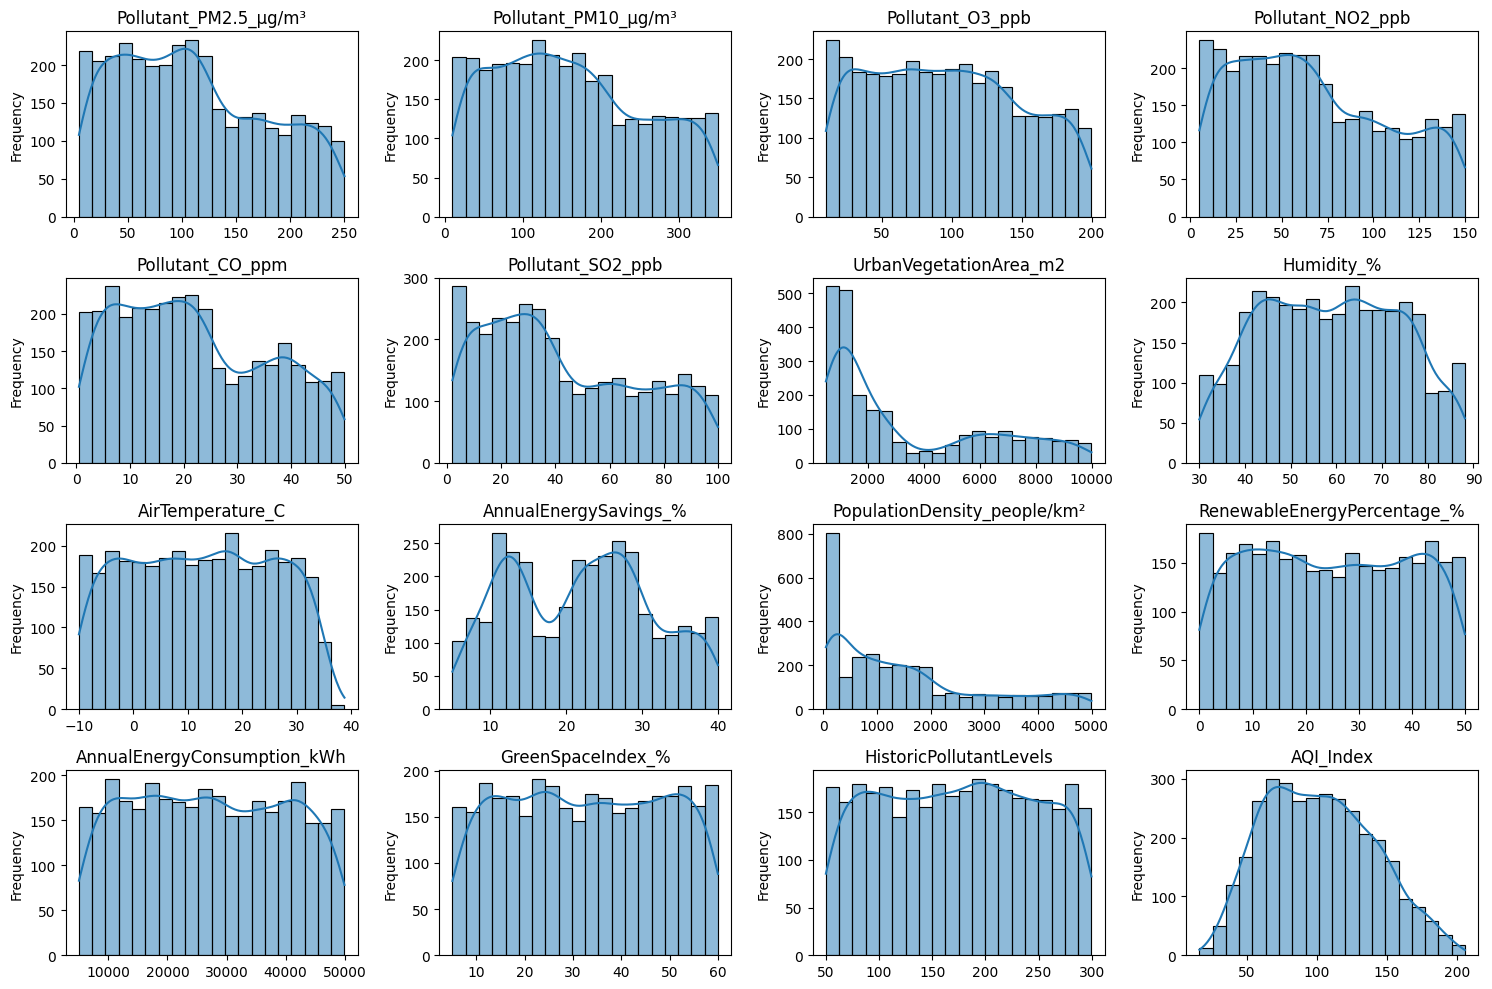

In [ ]:
# Visualisasi Distribusi Kolom Numerik
numerical_cols = df1.select_dtypes(include=["float64", "int"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df1[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Outlier

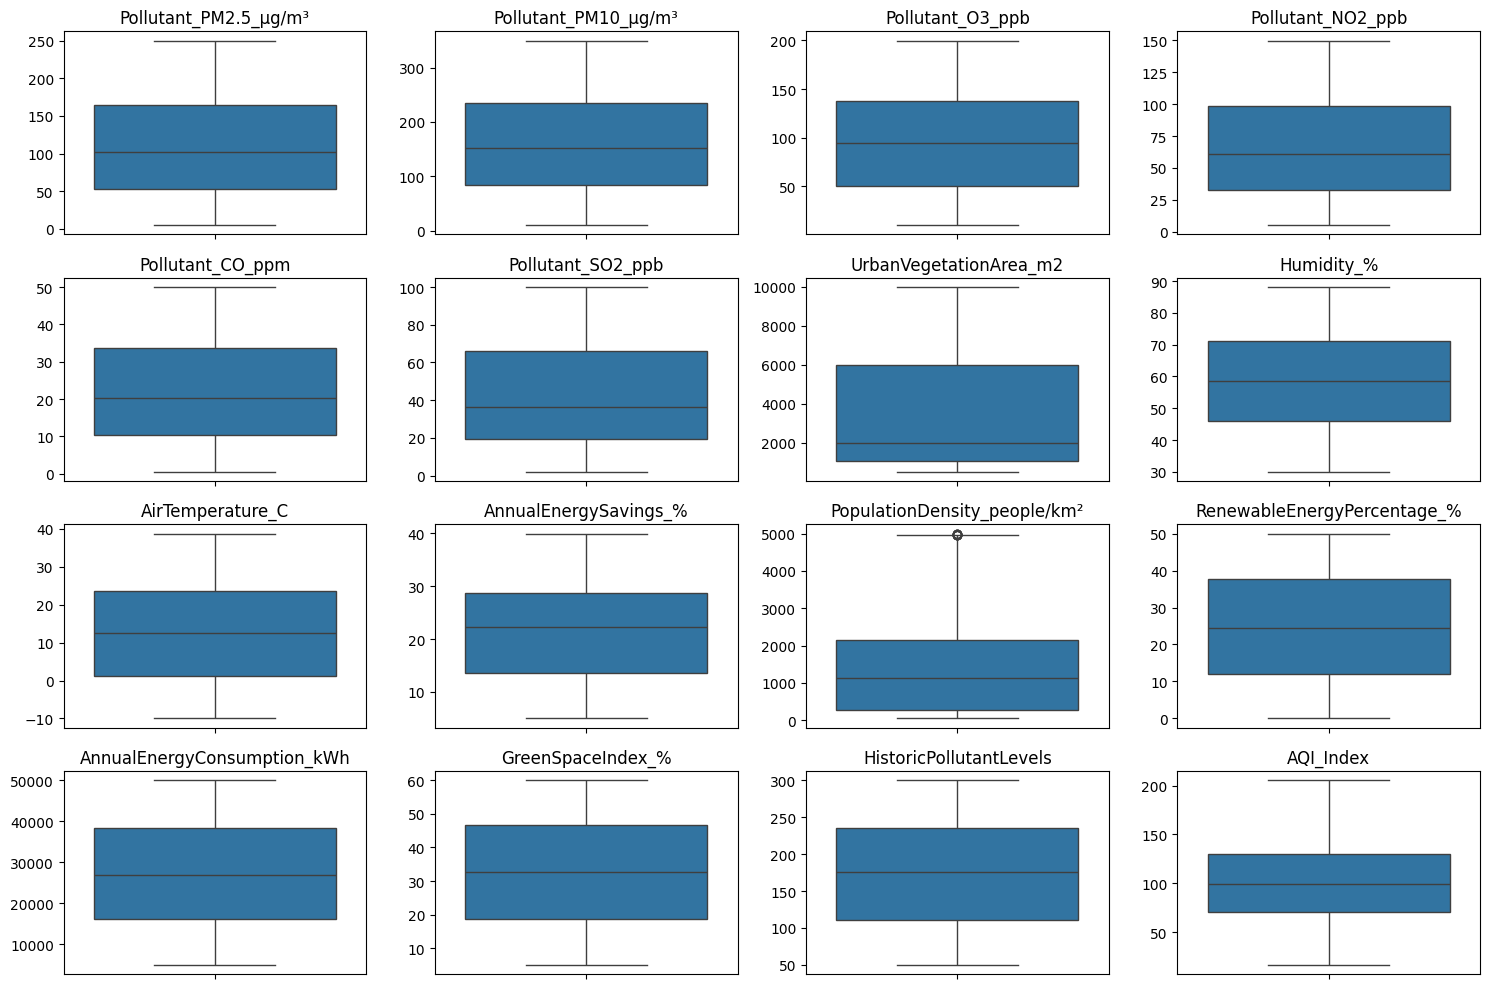

In [ ]:
# Visualisasi Boxplot untuk Mengecek Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(col)
    plt.ylabel("")
plt.tight_layout()
plt.show()

                           Fitur  Persentase Outlier (%)
0          Pollutant_PM2.5_µg/m³                0.000000
1           Pollutant_PM10_µg/m³                0.000000
2               Pollutant_O3_ppb                0.000000
3              Pollutant_NO2_ppb                0.000000
4               Pollutant_CO_ppm                0.000000
5              Pollutant_SO2_ppb                0.000000
6         UrbanVegetationArea_m2                0.000000
7                     Humidity_%                0.000000
8               AirTemperature_C                0.000000
9          AnnualEnergySavings_%                0.000000
10  PopulationDensity_people/km²                0.266667
11   RenewableEnergyPercentage_%                0.000000
12   AnnualEnergyConsumption_kWh                0.000000
13             GreenSpaceIndex_%                0.000000
14       HistoricPollutantLevels                0.000000
15                     AQI_Index                0.000000


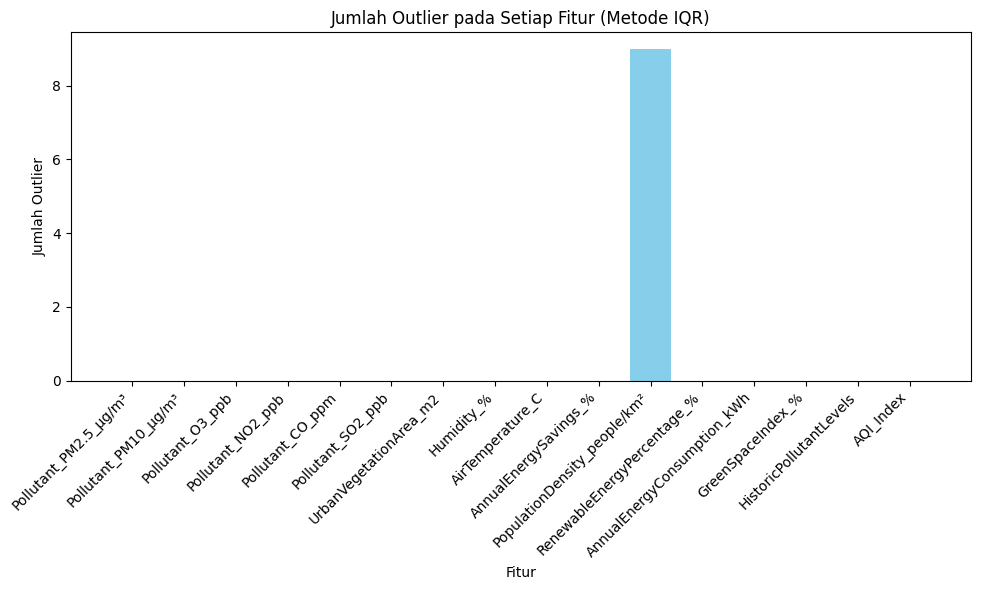

In [ ]:
# Filter hanya kolom numerik dari df1
numerical_cols = df1.select_dtypes(include=[np.number]).columns

# Menentukan outlier dengan metode IQR
outlier_counts = {}
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Persentase outlier
total_data = len(df1)
outlier_percentages = {col: (count / total_data) * 100 for col, count in outlier_counts.items()}

# Membuat DataFrame untuk persentase outlier
outlier_table = pd.DataFrame({
    'Fitur': list(outlier_percentages.keys()),
    'Persentase Outlier (%)': list(outlier_percentages.values())
})

print(outlier_table)

# Grafik Jumlah Outlier
plt.figure(figsize=(10, 6))
plt.bar(outlier_table['Fitur'], [outlier_counts[col] for col in numerical_cols], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Jumlah Outlier")
plt.xlabel("Fitur")
plt.title("Jumlah Outlier pada Setiap Fitur (Metode IQR)")
plt.tight_layout()
plt.show()

## Missing Value

In [ ]:
# Cek Missing Value
missing_values = df1.isnull().sum()
print("Jumlah Missing Values pada setiap kolom:")
print(missing_values)

# Cek Data Duplikat
duplicate_rows = df1.duplicated().sum()
print("\nJumlah Data Duplikat di df1:", duplicate_rows)

Jumlah Missing Values pada setiap kolom:
SensorLocation                    0
Pollutant_PM2.5_µg/m³             0
Pollutant_PM10_µg/m³              0
Pollutant_O3_ppb                  0
Pollutant_NO2_ppb                 0
Pollutant_CO_ppm                  0
Pollutant_SO2_ppb                 0
UrbanVegetationArea_m2          881
Humidity_%                        0
AirTemperature_C                  0
EnergySavingTechnology          367
AnnualEnergySavings_%             0
PopulationDensity_people/km²    368
RetrofitData                      0
RenewableEnergyPercentage_%     282
AnnualEnergyConsumption_kWh       0
GreenSpaceIndex_%                 0
HistoricPollutantLevels           0
Country                           0
AQI_Index                         0
dtype: int64

Jumlah Data Duplikat di df1: 0


In [ ]:
# Menghitung banyaknya nilai kategorik 'EnergySavingTechnology' berdasarkan 'Country'
category_count_by_country = df1.groupby('Country')['EnergySavingTechnology'].value_counts()

# Menampilkan hasil
print(category_count_by_country)

# Jika ingin hasilnya dalam bentuk DataFrame untuk visualisasi
category_count_by_country_df = category_count_by_country.unstack().fillna(0)
category_count_by_country_df

Country      EnergySavingTechnology
Brunei       Solar Panels              111
             Efficient HVAC             75
             LED Lighting               54
             Smart Thermostats          14
             Insulation                  9
Cambodia     Solar Panels               90
             LED Lighting               76
             Efficient HVAC             73
             Smart Thermostats          17
             Insulation                  7
Indonesia    Solar Panels              100
             Efficient HVAC             69
             LED Lighting               59
             Smart Thermostats          17
             Insulation                  8
Laos         Solar Panels              100
             Efficient HVAC             74
             LED Lighting               74
             Smart Thermostats          24
             Insulation                  6
Malaysia     Solar Panels              116
             LED Lighting               91
             Effic

EnergySavingTechnology  Efficient HVAC  Insulation  LED Lighting  \
Country                                                            
Brunei                              75           9            54   
Cambodia                            73           7            76   
Indonesia                           69           8            59   
Laos                                74           6            74   
Malaysia                            77           8            91   
Myanmar                             74           8            65   
Philippines                         71          11            83   
Singapore                           77           2            73   
Thailand                            54           7            68   
Timor-Leste                         78           5            65   
Vietnam                             69           8            55   

EnergySavingTechnology  Smart Thermostats  Solar Panels  
Country                                                  
Brunei                                 14           111  
Cambodia                               17            90  
Indonesia                              17           100  
Laos                                   24           100  
Malaysia                               20           116  
Myanmar                                31           114  
Philippines                            14           100  
Singapore                              12           113  
Thailand                               20            99  
Timor-Leste                            21           106  
Vietnam                                17           119

In [ ]:
# Imputasi Missing Values Numerik
df1['UrbanVegetationArea_m2'] = df1['UrbanVegetationArea_m2'].fillna(df1['UrbanVegetationArea_m2'].median())
df1['PopulationDensity_people/km²'] = df1['PopulationDensity_people/km²'].fillna(df1['PopulationDensity_people/km²'].median())
df1['RenewableEnergyPercentage_%'] = df1['RenewableEnergyPercentage_%'].fillna(df1['RenewableEnergyPercentage_%'].mean())

In [ ]:
# Cek Missing Value
missing_values = df1.isnull().sum()
print("Jumlah Missing Values pada setiap kolom:")
print(missing_values)

Jumlah Missing Values pada setiap kolom:
SensorLocation                    0
Pollutant_PM2.5_µg/m³             0
Pollutant_PM10_µg/m³              0
Pollutant_O3_ppb                  0
Pollutant_NO2_ppb                 0
Pollutant_CO_ppm                  0
Pollutant_SO2_ppb                 0
UrbanVegetationArea_m2            0
Humidity_%                        0
AirTemperature_C                  0
EnergySavingTechnology          367
AnnualEnergySavings_%             0
PopulationDensity_people/km²      0
RetrofitData                      0
RenewableEnergyPercentage_%       0
AnnualEnergyConsumption_kWh       0
GreenSpaceIndex_%                 0
HistoricPollutantLevels           0
Country                           0
AQI_Index                         0
dtype: int64


In [ ]:
# Menampilkan baris yang memiliki missing value pada kolom 'EnergySavingTechnology'
missing_rows = df1[df1['EnergySavingTechnology'].isnull()]

# Menampilkan hasil
missing_rows

SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
26              Urban                 193.03               344.350   
30    Industrial Area                  57.60               108.600   
53           Suburban                 197.41               310.100   
65    Industrial Area                 111.34               245.250   
76              Rural                  31.53               179.172   
...               ...                    ...                   ...   
9663            Rural                  31.15               125.646   
9778            Urban                 216.66               275.400   
9787  Industrial Area                  62.76               134.520   
9804            Rural                  99.78                10.896   
9805         Suburban                 223.34               331.210   

      Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  \
26             175.720            107.830            29.170   
30             162.080            133.510            37.310   
53             174.040             75.140            40.400   
65             191.990            130.110            41.610   
76              20.860             49.940             7.525   
...                ...                ...               ...   
9663            72.877             50.240             6.560   
9778           147.130             84.620            38.530   
9787            92.670             40.730             6.910   
9804            45.010             64.765             6.845   
9805           135.240            120.130            19.780   

      Pollutant_SO2_ppb  UrbanVegetationArea_m2  Humidity_%  AirTemperature_C  \
26               71.950                1982.355       56.25             -1.74   
30                6.180                 519.460       65.16             26.60   
53               23.090                5234.960       63.04             -4.76   
65                6.210                1289.630       45.77             -3.58   
76               20.160                5473.330       64.77             24.46   
...                 ...                     ...         ...               ...   
9663             15.948                9211.060       76.78             14.60   
9778             32.710                1205.360       48.34             33.52   
9787             26.910                 535.930       51.84              6.70   
9804             32.316                6843.730       47.97             31.98   
9805              2.000                6170.040       60.76             32.74   

     EnergySavingTechnology  AnnualEnergySavings_%  \
26                      NaN                  13.72   
30                      NaN                  17.02   
53                      NaN                  28.48   
65                      NaN                  25.83   
76                      NaN                  26.45   
...                     ...                    ...   
9663                    NaN                  24.20   
9778                    NaN                   8.90   
9787                    NaN                  29.79   
9804                    NaN                  12.29   
9805                    NaN                   9.76   

      PopulationDensity_people/km² RetrofitData  RenewableEnergyPercentage_%  \
26                         4040.14          Yes                      3.75000   
30                         1987.56          Yes                     11.12000   
53                         1121.06          Yes                     24.72548   
65                          933.52          Yes                     13.39000   
76                          163.70          Yes                     37.48000   
...                            ...          ...                          ...   
9663                        233.10          Yes                     20.98000   
9778                       4974.25           No                      0.75000   
9787                        712.52           No                    

In [ ]:
# Imputasi missing values berdasarkan kombinasi 'Country' dan 'SensorLocation' menggunakan transform
df1['EnergySavingTechnology'] = df1.groupby(['Country', 'SensorLocation'])['EnergySavingTechnology'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

## EDA

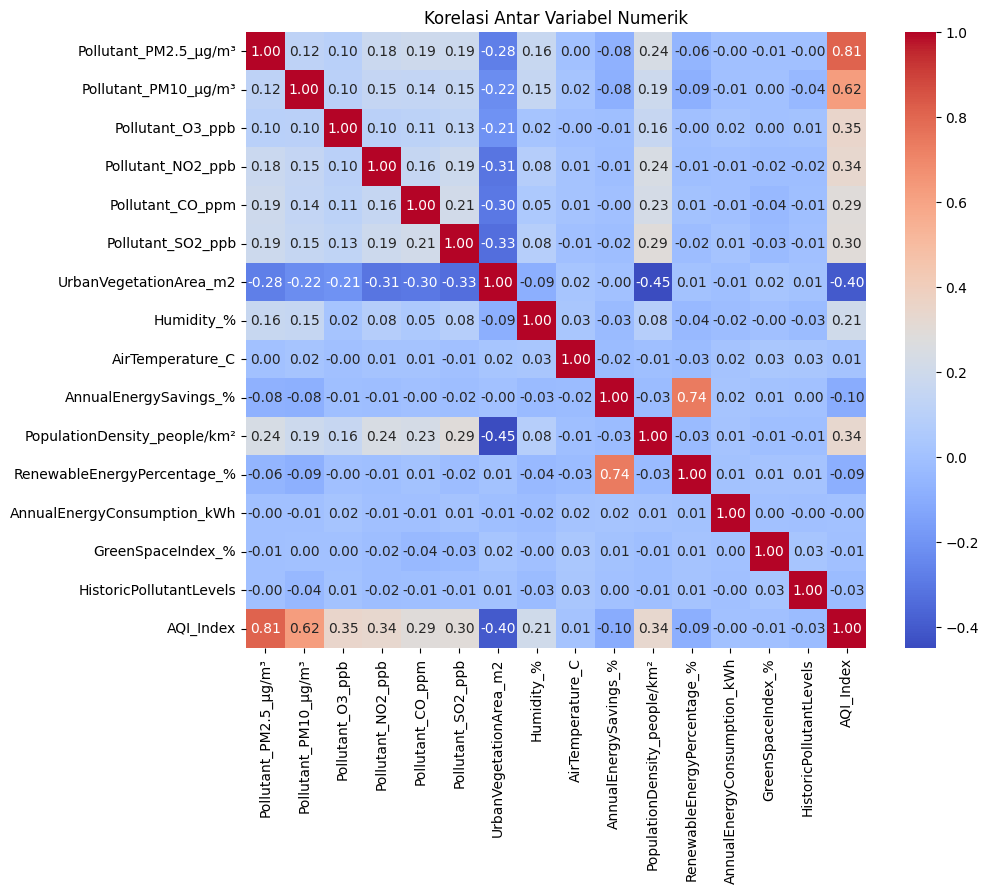

In [ ]:
# Pilih hanya kolom numerik
numerical_columns = df1.select_dtypes(include=['float64', 'int']).columns

# Hitung korelasi antar kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df1[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Dari heatmap korelasi yang ditampilkan, kita bisa memahami hubungan antara variabel numerik dalam dataset. Berikut adalah beberapa poin yang dapat disimpulkan:

---

 **1. Korelasi Positif dan Negatif**
- **Korelasi Positif:** Jika nilai korelasi mendekati +1, maka kedua variabel memiliki hubungan positif yang kuat (ketika satu naik, yang lain juga naik).
  - Contoh: **`Pollutant_PM2.5_µg/m³`** memiliki korelasi **0.81** dengan **`AQI_Index`**, yang menunjukkan bahwa peningkatan PM2.5 secara signifikan meningkatkan indeks kualitas udara (AQI), menandakan kondisi udara yang lebih buruk.
  
- **Korelasi Negatif:** Jika nilai korelasi mendekati -1, maka kedua variabel memiliki hubungan negatif yang kuat (ketika satu naik, yang lain turun).
  - Contoh: **`UrbanVegetationArea_m2`** memiliki korelasi **-0.40** dengan **`AQI_Index`**, yang menunjukkan bahwa semakin banyak area vegetasi di perkotaan, kualitas udara cenderung lebih baik (AQI lebih rendah).

---

 **2. Hubungan Variabel dengan AQI_Index**
- **PM2.5 (0.81):** Korelasi sangat kuat. Peningkatan konsentrasi PM2.5 memiliki dampak besar terhadap AQI.
- **PM10 (0.62):** Korelasi cukup kuat. Peningkatan PM10 juga berkontribusi pada AQI.
- **Ozon (O3), NO2, CO, dan SO2 (0.29 - 0.35):** Korelasi lemah hingga sedang. Gas-gas ini juga memengaruhi AQI, tetapi dampaknya tidak sebesar PM2.5 dan PM10.
- **UrbanVegetationArea_m2 (-0.40):** Korelasi negatif sedang. Lebih banyak vegetasi membantu mengurangi polusi udara dan menurunkan AQI.

---

 **3. Hubungan Antara Variabel Lain**
- **`PopulationDensity_people/km²` vs `UrbanVegetationArea_m2` (-0.45):**
  - Korelasi negatif moderat, menunjukkan bahwa area dengan populasi yang padat cenderung memiliki lebih sedikit vegetasi.
  
- **`AnnualEnergySavings_%` vs `RenewableEnergyPercentage_%` (0.74):**
  - Korelasi positif kuat. Wilayah dengan penggunaan energi terbarukan yang lebih tinggi cenderung memiliki penghematan energi tahunan yang lebih baik.

---

 **4. Interpretasi Umum**
- **Variabel Penting untuk AQI:**
  - PM2.5, PM10, UrbanVegetationArea, dan PopulationDensity memiliki pengaruh besar pada AQI.
- **Korelasi Kuat Lainnya:**
  - Beberapa variabel energi, seperti RenewableEnergyPercentage dan AnnualEnergySavings, menunjukkan hubungan erat yang dapat dieksplorasi lebih lanjut untuk analisis energi.

---



# Asia Timur

In [ ]:
# Daftar negara Asia Timur berdasarkan data unik
asia_timur = ['Japan', 'China', 'Mongolia', 'South Korea']

# Membuat DataFrame untuk Asia Timur
df2 = df[df['Country'].isin(asia_timur)]
print("\nDataFrame Asia Timur:")
df2


DataFrame Asia Timur:


SensorID   SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
6     S000007         Suburban                 66.870                158.73   
9     S000010  Industrial Area                117.520                281.39   
13    S000014  Industrial Area                 64.470                280.64   
19    S000020            Urban                 92.630                116.07   
20    S000021            Urban                 29.670                154.37   
...       ...              ...                    ...                   ...   
9796  S009797            Urban                 73.950                339.93   
9800  S009801         Suburban                185.260                194.24   
9817  S009818         Suburban                205.090                103.97   
9821  S009822            Rural                 95.120                 75.78   
9834  S009835            Rural                121.125                140.85   

      Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  \
6               80.820            119.160            43.070   
9               16.130            140.070            26.510   
13              57.170             48.440            20.660   
19             151.800            146.560            10.550   
20              40.970             69.190            40.520   
...                ...                ...               ...   
9796            24.010             87.600            39.600   
9800            13.850             79.550            47.940   
9817           106.790            147.830            27.300   
9821            47.852             64.165             8.195   
9834            66.675              7.400            23.985   

      Pollutant_SO2_ppb  UrbanVegetationArea_m2  Humidity_%  AirTemperature_C  \
6                 6.590                 3448.90       44.89             31.82   
9                 4.880                  567.95       70.34             15.34   
13               21.280                     NaN       86.29             27.84   
19                5.400                 1868.94       67.09             12.98   
20               98.190                     NaN       72.48             22.55   
...                 ...                     ...         ...               ...   
9796             25.990                     NaN       77.90              9.60   
9800             86.290                     NaN       85.34             25.77   
9817             75.730                 5734.73       54.99              4.18   
9821             26.512                 7764.28       51.29             20.09   
9834              4.188                 7068.75       51.67             33.16   

     EnergySavingTechnology  AnnualEnergySavings_%  \
6              Solar Panels                   9.95   
9            Efficient HVAC                   6.90   
13               Insulation                  18.94   
19           Efficient HVAC                  22.98   
20           Efficient HVAC                   5.24   
...                     ...                    ...   
9796           Solar Panels                  24.70   
9800                    NaN                  20.01   
9817           Solar Panels                  20.38   
9821           Solar Panels                  25.15   
9834         Efficient HVAC                  12.14   

      PopulationDensity_people/km² RetrofitData  RenewableEnergyPercentage_%  \
6                           510.90           No                         6.67   
9                           841.80          Yes                         3.22   
13                         1514.62           No                        10.91   
19                         3696.05           No                          NaN   
20                             NaN           No                         6.05   
...                            ...          ...                          ...   
9796                       1696.62           No                        31.76   
9800                        777.39   

In [ ]:
# Menghapus kolom SensorID dari df2
df2 = df2.drop(columns=['SensorID'])

## Distribusi

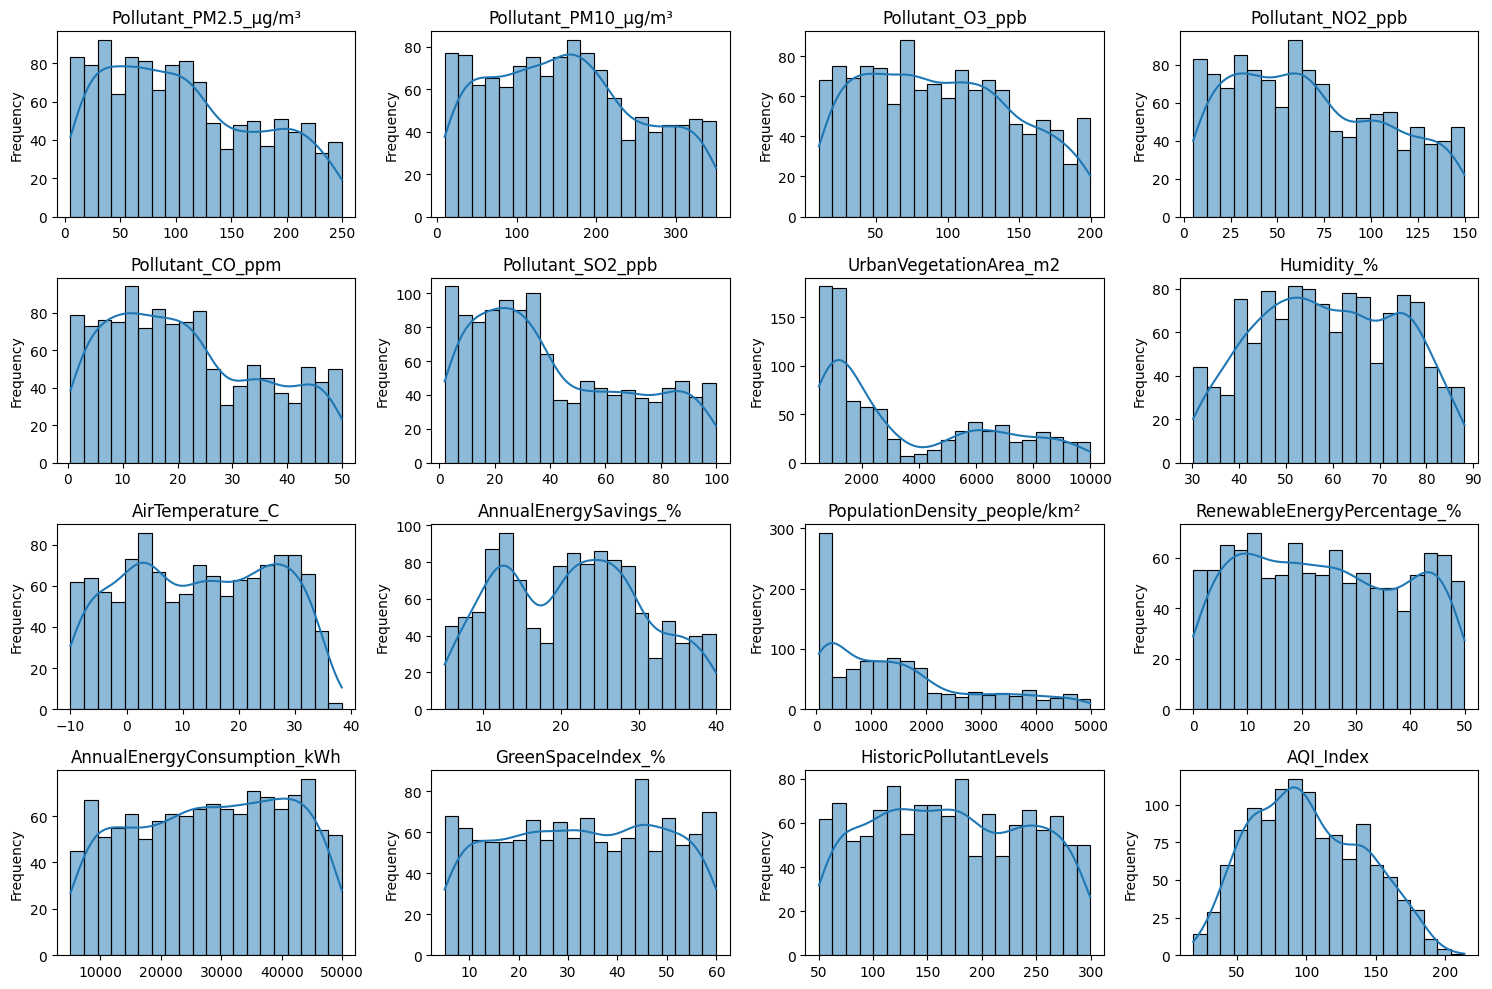

In [ ]:
# Visualisasi Distribusi Kolom Numerik
numerical_cols = df2.select_dtypes(include=["float64", "int"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df2[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Outlier

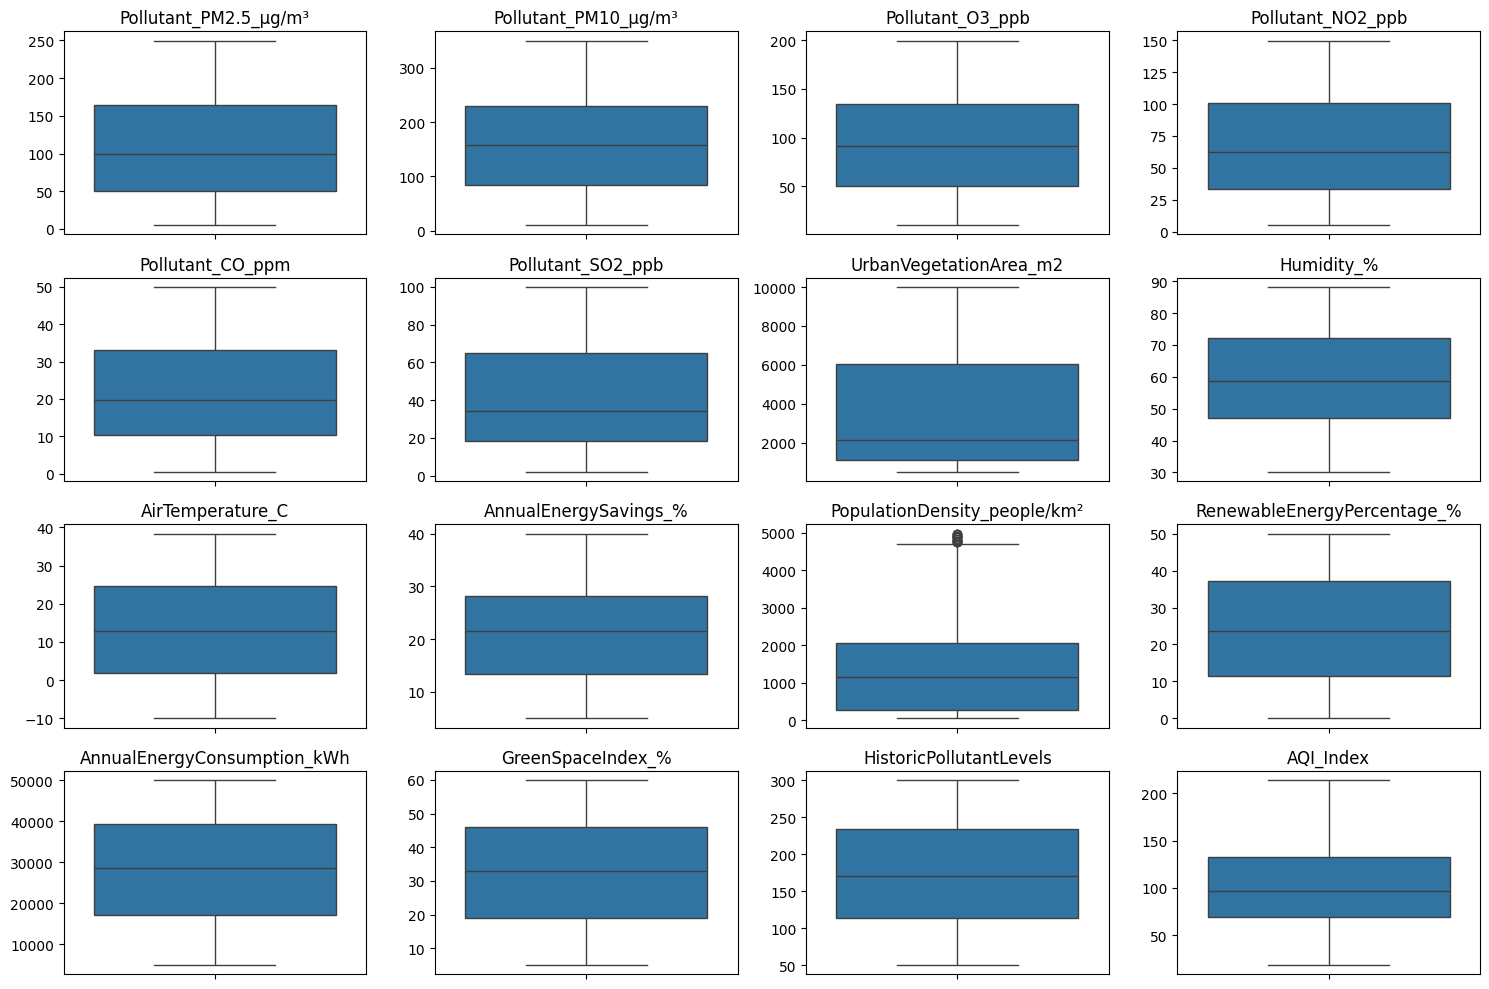

In [ ]:
# Visualisasi Boxplot untuk Mengecek Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df2[col])
    plt.title(col)
    plt.ylabel("")
plt.tight_layout()
plt.show()

                           Fitur  Persentase Outlier (%)
0          Pollutant_PM2.5_µg/m³                0.000000
1           Pollutant_PM10_µg/m³                0.000000
2               Pollutant_O3_ppb                0.000000
3              Pollutant_NO2_ppb                0.000000
4               Pollutant_CO_ppm                0.000000
5              Pollutant_SO2_ppb                0.000000
6         UrbanVegetationArea_m2                0.000000
7                     Humidity_%                0.000000
8               AirTemperature_C                0.000000
9          AnnualEnergySavings_%                0.000000
10  PopulationDensity_people/km²                1.401484
11   RenewableEnergyPercentage_%                0.000000
12   AnnualEnergyConsumption_kWh                0.000000
13             GreenSpaceIndex_%                0.000000
14       HistoricPollutantLevels                0.000000
15                     AQI_Index                0.000000


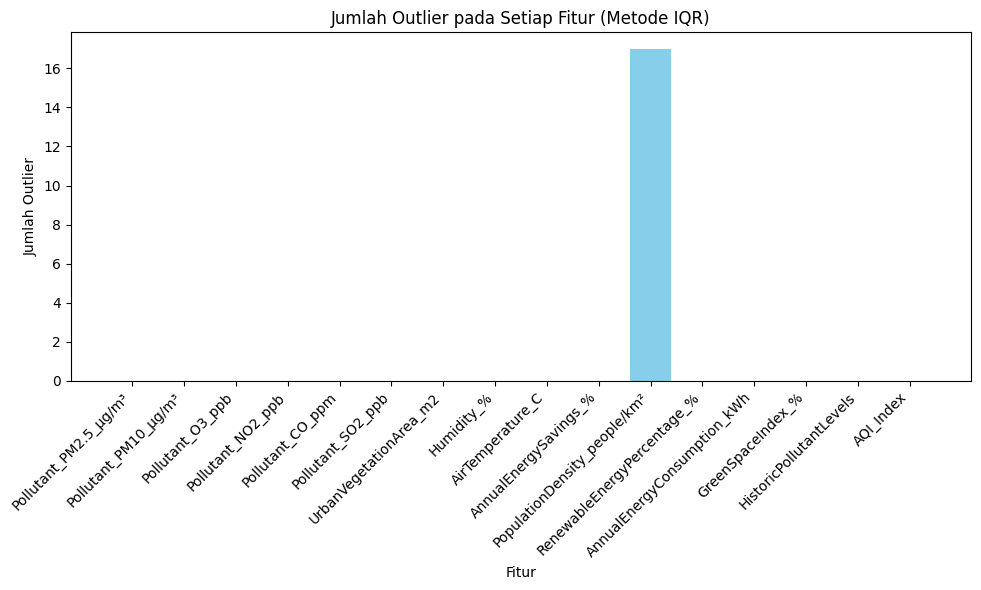

In [ ]:
# Filter hanya kolom numerik dari df2
numerical_cols = df2.select_dtypes(include=[np.number]).columns

# Menentukan outlier dengan metode IQR
outlier_counts = {}
for col in numerical_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Persentase outlier
total_data = len(df2)
outlier_percentages = {col: (count / total_data) * 100 for col, count in outlier_counts.items()}

# Membuat DataFrame untuk persentase outlier
outlier_table = pd.DataFrame({
    'Fitur': list(outlier_percentages.keys()),
    'Persentase Outlier (%)': list(outlier_percentages.values())
})

print(outlier_table)

# Grafik Jumlah Outlier
plt.figure(figsize=(10, 6))
plt.bar(outlier_table['Fitur'], [outlier_counts[col] for col in numerical_cols], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Jumlah Outlier")
plt.xlabel("Fitur")
plt.title("Jumlah Outlier pada Setiap Fitur (Metode IQR)")
plt.tight_layout()
plt.show()

## Missing Value

In [ ]:
# Cek Missing Value
missing_values = df2.isnull().sum()
print("Jumlah Missing Values pada setiap kolom:")
print(missing_values)

# Cek Data Duplikat
duplicate_rows = df2.duplicated().sum()
print("\nJumlah Data Duplikat di df2:", duplicate_rows)

Jumlah Missing Values pada setiap kolom:
SensorLocation                    0
Pollutant_PM2.5_µg/m³             0
Pollutant_PM10_µg/m³              0
Pollutant_O3_ppb                  0
Pollutant_NO2_ppb                 0
Pollutant_CO_ppm                  0
Pollutant_SO2_ppb                 0
UrbanVegetationArea_m2          303
Humidity_%                        0
AirTemperature_C                  0
EnergySavingTechnology          134
AnnualEnergySavings_%             0
PopulationDensity_people/km²    133
RetrofitData                      0
RenewableEnergyPercentage_%      98
AnnualEnergyConsumption_kWh       0
GreenSpaceIndex_%                 0
HistoricPollutantLevels           0
Country                           0
AQI_Index                         0
dtype: int64

Jumlah Data Duplikat di df2: 0


In [ ]:
# Menghitung banyaknya nilai kategorik 'EnergySavingTechnology' berdasarkan 'Country'
category_count_by_country = df2.groupby('Country')['EnergySavingTechnology'].value_counts()

# Menampilkan hasil
print(category_count_by_country)

# Jika ingin hasilnya dalam bentuk DataFrame untuk visualisasi
category_count_by_country_df = category_count_by_country.unstack().fillna(0)
category_count_by_country_df

Country      EnergySavingTechnology
China        Solar Panels              105
             Efficient HVAC             71
             LED Lighting               62
             Smart Thermostats          24
             Insulation                  8
Japan        Solar Panels              102
             Efficient HVAC             82
             LED Lighting               59
             Smart Thermostats          16
             Insulation                  5
Mongolia     Solar Panels              112
             LED Lighting               72
             Efficient HVAC             70
             Smart Thermostats          16
             Insulation                  5
South Korea  Solar Panels              102
             LED Lighting               77
             Efficient HVAC             68
             Smart Thermostats          12
             Insulation                 11
Name: count, dtype: int64


EnergySavingTechnology  Efficient HVAC  Insulation  LED Lighting  \
Country                                                            
China                               71           8            62   
Japan                               82           5            59   
Mongolia                            70           5            72   
South Korea                         68          11            77   

EnergySavingTechnology  Smart Thermostats  Solar Panels  
Country                                                  
China                                  24           105  
Japan                                  16           102  
Mongolia                               16           112  
South Korea                            12           102

In [ ]:
# Imputasi Missing Values Numerik untuk df2
df2['UrbanVegetationArea_m2'] = df2['UrbanVegetationArea_m2'].fillna(df2['UrbanVegetationArea_m2'].median())
df2['PopulationDensity_people/km²'] = df2['PopulationDensity_people/km²'].fillna(df2['PopulationDensity_people/km²'].median())
df2['RenewableEnergyPercentage_%'] = df2['RenewableEnergyPercentage_%'].fillna(df2['RenewableEnergyPercentage_%'].mean())

In [ ]:
# Cek Missing Value
missing_values = df2.isnull().sum()
print("Jumlah Missing Values pada setiap kolom:")
print(missing_values)

Jumlah Missing Values pada setiap kolom:
SensorLocation                    0
Pollutant_PM2.5_µg/m³             0
Pollutant_PM10_µg/m³              0
Pollutant_O3_ppb                  0
Pollutant_NO2_ppb                 0
Pollutant_CO_ppm                  0
Pollutant_SO2_ppb                 0
UrbanVegetationArea_m2            0
Humidity_%                        0
AirTemperature_C                  0
EnergySavingTechnology          134
AnnualEnergySavings_%             0
PopulationDensity_people/km²      0
RetrofitData                      0
RenewableEnergyPercentage_%       0
AnnualEnergyConsumption_kWh       0
GreenSpaceIndex_%                 0
HistoricPollutantLevels           0
Country                           0
AQI_Index                         0
dtype: int64


In [ ]:
# Menampilkan baris yang memiliki missing value pada kolom 'EnergySavingTechnology'
missing_rows = df2[df2['EnergySavingTechnology'].isnull()]

# Menampilkan hasil
missing_rows

SensorLocation  Pollutant_PM2.5_µg/m³  Pollutant_PM10_µg/m³  \
66    Industrial Area                 75.870                174.38   
162             Urban                209.500                331.79   
191             Urban                207.770                265.11   
321             Rural                 69.305                 34.74   
432             Urban                249.150                341.86   
...               ...                    ...                   ...   
9305  Industrial Area                196.870                272.26   
9656            Urban                 66.780                159.05   
9666         Suburban                181.400                336.46   
9752  Industrial Area                158.590                 90.18   
9800         Suburban                185.260                194.24   

      Pollutant_O3_ppb  Pollutant_NO2_ppb  Pollutant_CO_ppm  \
66              89.270             81.810             46.96   
162             86.810            132.320             28.78   
191            161.800            126.500             47.16   
321             97.993             29.145              7.20   
432            181.140            111.140             31.63   
...                ...                ...               ...   
9305           132.770            130.540             24.26   
9656           114.140            100.260              6.48   
9666           173.160            121.950             43.77   
9752            56.930             46.010             26.06   
9800            13.850             79.550             47.94   

      Pollutant_SO2_ppb  UrbanVegetationArea_m2  Humidity_%  AirTemperature_C  \
66                35.69                1355.780       58.35             -9.50   
162               49.11                2156.920       40.02             28.37   
191               41.13                2122.365       63.85             -8.70   
321                8.88                8019.730       57.74             24.25   
432               84.32                2122.365       76.51             -4.53   
...                 ...                     ...         ...               ...   
9305              91.24                1443.270       63.44             27.92   
9656              68.40                2122.365       32.94              1.44   
9666              41.93                3342.330       78.62              4.42   
9752              37.40                 664.180       73.25             20.56   
9800              86.29                2122.365       85.34             25.77   

     EnergySavingTechnology  AnnualEnergySavings_%  \
66                      NaN                  34.95   
162                     NaN                   8.37   
191                     NaN                  33.73   
321                     NaN                  25.02   
432                     NaN                   6.37   
...                     ...                    ...   
9305                    NaN                  20.26   
9656                    NaN                   5.69   
9666                    NaN                  13.40   
9752                    NaN                  21.59   
9800                    NaN                  20.01   

      PopulationDensity_people/km² RetrofitData  RenewableEnergyPercentage_%  \
66                        1166.625           No                        46.20   
162                       2682.190           No                         5.98   
191                       1934.480           No                        37.63   
321                         73.010          Yes                        48.09   
432                       1166.625           No                         8.07   
...                            ...          ...                          ...   
9305                      1166.625          Yes                        45.25   
9656                      4702.560           No                         3.49   
9666                       819.160           No                    

In [ ]:
# Imputasi missing values berdasarkan kombinasi 'Country' dan 'SensorLocation' menggunakan transform
df2['EnergySavingTechnology'] = df2.groupby(['Country', 'SensorLocation'])['EnergySavingTechnology'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

## EDA

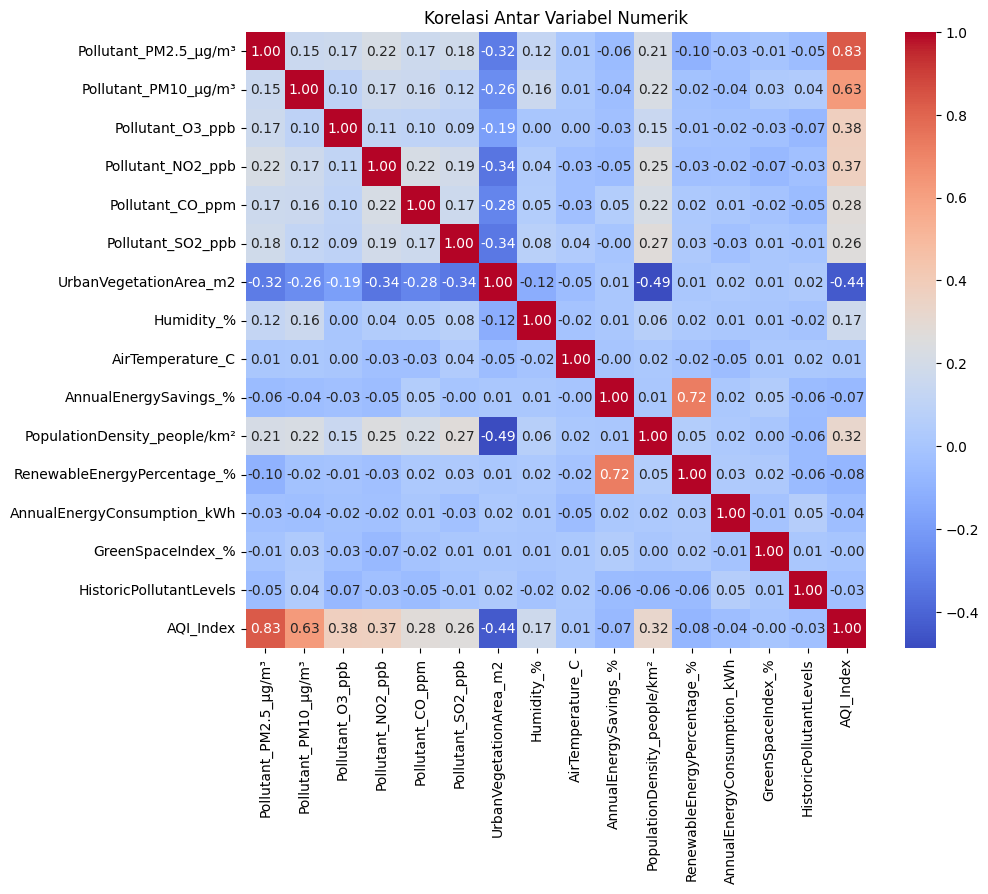

In [ ]:
# Pilih hanya kolom numerik
numerical_columns = df2.select_dtypes(include=['float64', 'int']).columns

# Hitung korelasi antar kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df2[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Rumusan Masalah

Rumusan Masalah:

1. Bagaimana hubungan faktor energi dan lingkungan terhadap kualitas udara (AQI) di Asia Tenggara dan Asia Timur?
2. Model prediksi mana yang paling efektif untuk memprediksi AQI berdasarkan data energi dan lingkungan di masing-masing wilayah?
3. Faktor mana yang paling signifikan dalam memengaruhi AQI di kedua wilayah?
4. Bagaimana hasil prediksi dapat digunakan untuk mengembangkan strategi kota pintar yang berkelanjutan?

## [No.1] Hubungan Faktor Energi dan Lingkungan terhadap AQI
1. Bagaimana hubungan faktor energi dan lingkungan terhadap kualitas udara (AQI) di Asia Tenggara dan Asia Timur?

In [ ]:
# Pilih hanya kolom numerik
numerical_columns_df1 = df1.select_dtypes(include=['float64', 'int']).columns
numerical_columns_df2 = df2.select_dtypes(include=['float64', 'int']).columns

# Hitung korelasi untuk Asia Tenggara
corr_df1 = df1[numerical_columns_df1].corr()

# Hitung korelasi untuk Asia Timur
corr_df2 = df2[numerical_columns_df2].corr()

print("Korelasi Asia Tenggara:")
print(corr_df1['AQI_Index'].sort_values(ascending=False))

print("\nKorelasi Asia Timur:")
print(corr_df2['AQI_Index'].sort_values(ascending=False))

Korelasi Asia Tenggara:
AQI_Index                       1.000000
Pollutant_PM2.5_µg/m³           0.810621
Pollutant_PM10_µg/m³            0.621161
Pollutant_O3_ppb                0.346031
Pollutant_NO2_ppb               0.336891
PopulationDensity_people/km²    0.336246
Pollutant_SO2_ppb               0.297939
Pollutant_CO_ppm                0.287821
Humidity_%                      0.205828
AirTemperature_C                0.010817
AnnualEnergyConsumption_kWh    -0.000959
GreenSpaceIndex_%              -0.006755
HistoricPollutantLevels        -0.025152
RenewableEnergyPercentage_%    -0.087341
AnnualEnergySavings_%          -0.098443
UrbanVegetationArea_m2         -0.402875
Name: AQI_Index, dtype: float64

Korelasi Asia Timur:
AQI_Index                       1.000000
Pollutant_PM2.5_µg/m³           0.829370
Pollutant_PM10_µg/m³            0.625919
Pollutant_O3_ppb                0.376715
Pollutant_NO2_ppb               0.370150
PopulationDensity_people/km²    0.322341
Pollutant_CO_ppm    

Dari hasil korelasi di atas, kita dapat memahami faktor-faktor yang memengaruhi **AQI (Air Quality Index)** di Asia Tenggara dan Asia Timur. Berikut adalah analisis dan interpretasi yang relevan dengan rumusan masalah:

---

 **1. Faktor yang Signifikan dalam Memengaruhi AQI**
 **Asia Tenggara:**
- **Korelasi Positif (Meningkatkan AQI):**
  - **`Pollutant_PM2.5_µg/m³` (0.81):** PM2.5 adalah faktor dominan yang sangat memengaruhi AQI. Konsentrasi partikel kecil ini memiliki dampak besar terhadap kualitas udara.
  - **`Pollutant_PM10_µg/m³` (0.62):** PM10 juga berkontribusi signifikan terhadap AQI.
  - **`Pollutant_O3_ppb`, `Pollutant_NO2_ppb`, `PopulationDensity_people/km²`:** Korelasi sedang menunjukkan gas polutan dan kepadatan populasi turut meningkatkan AQI.

- **Korelasi Negatif (Mengurangi AQI):**
  - **`UrbanVegetationArea_m2` (-0.40):** Vegetasi perkotaan memiliki efek signifikan dalam mengurangi AQI, menandakan pentingnya ruang hijau di wilayah perkotaan.
  - **`AnnualEnergySavings_%` (-0.10):** Korelasi negatif kecil menunjukkan bahwa efisiensi energi sedikit membantu mengurangi AQI.
  - **`RenewableEnergyPercentage_%` (-0.09):** Energi terbarukan sedikit mengurangi AQI, meskipun pengaruhnya lemah.

---

 **Asia Timur:**
- **Korelasi Positif (Meningkatkan AQI):**
  - **`Pollutant_PM2.5_µg/m³` (0.83):** PM2.5 tetap menjadi faktor utama yang meningkatkan AQI di Asia Timur.
  - **`Pollutant_PM10_µg/m³` (0.63):** PM10 berkontribusi signifikan, mirip dengan Asia Tenggara.
  - **`Pollutant_O3_ppb`, `Pollutant_NO2_ppb`, `PopulationDensity_people/km²`:** Faktor ini juga memberikan dampak sedang terhadap AQI.

- **Korelasi Negatif (Mengurangi AQI):**
  - **`UrbanVegetationArea_m2` (-0.44):** Korelasi lebih kuat dibandingkan Asia Tenggara, menunjukkan bahwa vegetasi di Asia Timur memiliki dampak yang lebih besar dalam mengurangi AQI.
  - **`RenewableEnergyPercentage_%` (-0.08):** Pengaruh energi terbarukan terhadap AQI tetap kecil, mirip dengan Asia Tenggara.

---

 **2. Perbandingan Asia Tenggara vs Asia Timur**
- **PM2.5 dan PM10:** Kedua wilayah menunjukkan bahwa partikel ini adalah faktor dominan yang memengaruhi AQI, dengan Asia Timur memiliki korelasi yang sedikit lebih tinggi.
- **UrbanVegetationArea:** Dampak ruang hijau lebih besar di Asia Timur (-0.44) dibandingkan Asia Tenggara (-0.40), menunjukkan bahwa urbanisasi di Asia Timur mungkin lebih terkendali dengan penggunaan vegetasi.
- **Energi Terbarukan:** Pengaruh energi terbarukan terhadap AQI lemah di kedua wilayah, tetapi masih memberikan kontribusi positif kecil.

---

 **3. Rekomendasi Berdasarkan Analisis**

 **Kebijakan Energi dan Lingkungan:**
1. **Fokus pada Pengurangan PM2.5 dan PM10:**
   - Implementasi filter udara dan regulasi industri untuk menurunkan emisi partikel ini.
   - Kampanye pengurangan pembakaran terbuka dan penggunaan kendaraan bermotor berbahan bakar fosil.

2. **Optimalisasi Ruang Hijau di Kota:**
   - Tingkatkan area vegetasi di wilayah perkotaan, terutama di daerah dengan kepadatan populasi tinggi.
   - Investasi dalam taman kota dan dinding hijau.

3. **Pengembangan Energi Terbarukan:**
   - Integrasi energi terbarukan yang lebih agresif untuk mendukung pengurangan polusi udara.

4. **Pemantauan Berbasis Data:**
   - Gunakan sistem IoT untuk memantau PM2.5, PM10, dan faktor polusi lain secara real-time.

---



## [No.2] Model untuk Prediksi AQI
2. Model prediksi mana yang paling efektif untuk memprediksi AQI berdasarkan data energi dan lingkungan di masing-masing wilayah?

### Label Encoding

In [ ]:
df1_noencode = df1.copy()
df2_noencode = df2.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['SensorLocation', 'EnergySavingTechnology'], drop_first=True)

# Label Encoding untuk RetrofitData
label_encoder = LabelEncoder()
df1['RetrofitData'] = label_encoder.fit_transform(df1['RetrofitData'])

# One-Hot Encoding untuk kolom 'SensorLocation' dan 'EnergySavingTechnology' pada df2
df2 = pd.get_dummies(df2, columns=['SensorLocation', 'EnergySavingTechnology'], drop_first=True)

# Label Encoding untuk kolom 'RetrofitData' pada df2
label_encoder = LabelEncoder()
df2['RetrofitData'] = label_encoder.fit_transform(df2['RetrofitData'])

# Label Ecoding untuk kolom 'Country'
label_encoder = LabelEncoder()
df1['Country'] = label_encoder.fit_transform(df1['Country'])
df2['Country'] = label_encoder.fit_transform(df2['Country'])

In [ ]:
# Konversi semua kolom boolean ke integer (0/1)
df1 = df1.astype({col: 'int' for col in df1.select_dtypes('bool').columns})
df2 = df2.astype({col: 'int' for col in df2.select_dtypes('bool').columns})

### Feature Selection

Mutual Information, Select KBest, Domain Knowledge

#### Mutual Information

Pollutant_PM2.5_µg/m³           0.526763
Pollutant_PM10_µg/m³            0.297172
SensorLocation                  0.246738
PopulationDensity_people/km²    0.198270
UrbanVegetationArea_m2          0.145414
Pollutant_NO2_ppb               0.095582
Pollutant_SO2_ppb               0.091287
Pollutant_O3_ppb                0.082586
Humidity_%                      0.069629
Pollutant_CO_ppm                0.054203
RenewableEnergyPercentage_%     0.051929
AnnualEnergySavings_%           0.038270
AirTemperature_C                0.027052
Country                         0.023602
EnergySavingTechnology          0.015733
GreenSpaceIndex_%               0.008880
RetrofitData                    0.005849
AnnualEnergyConsumption_kWh     0.000000
HistoricPollutantLevels         0.000000
Name: MI Scores, dtype: float64


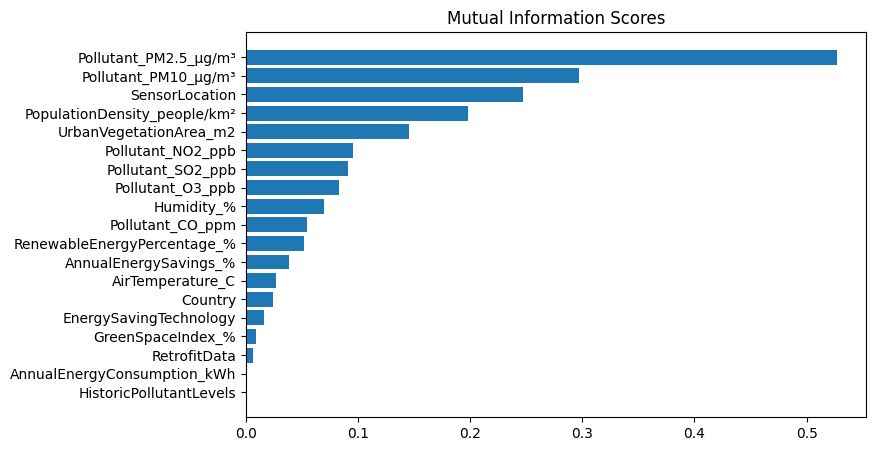

In [ ]:
# df1
X = df1_noencode.copy()
y = X.pop('AQI_Index')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Pollutant_PM2.5_µg/m³           0.599415
Pollutant_PM10_µg/m³            0.320872
SensorLocation                  0.263350
UrbanVegetationArea_m2          0.217674
PopulationDensity_people/km²    0.184217
Pollutant_NO2_ppb               0.104413
Pollutant_O3_ppb                0.075872
Humidity_%                      0.067656
Pollutant_CO_ppm                0.060139
Pollutant_SO2_ppb               0.039452
RenewableEnergyPercentage_%     0.026263
HistoricPollutantLevels         0.026255
AnnualEnergySavings_%           0.023647
AirTemperature_C                0.016886
Country                         0.004567
RetrofitData                    0.000000
AnnualEnergyConsumption_kWh     0.000000
GreenSpaceIndex_%               0.000000
EnergySavingTechnology          0.000000
Name: MI Scores, dtype: float64


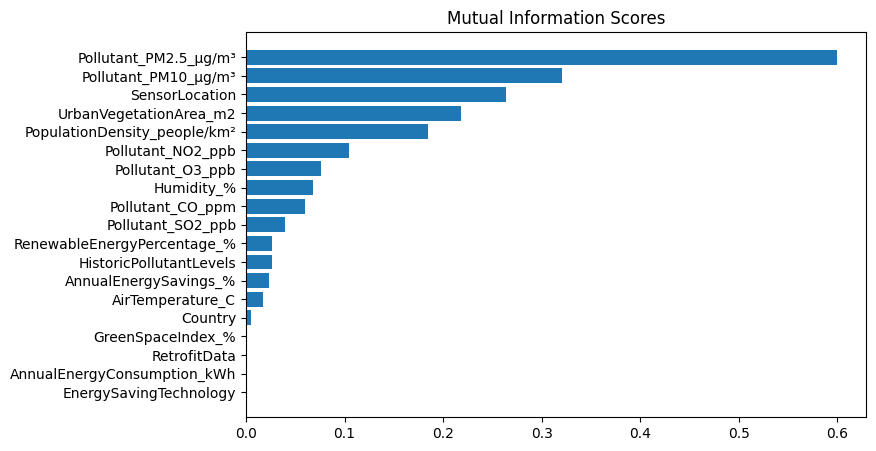

In [ ]:
# df2
X = df2_noencode.copy()
y = X.pop('AQI_Index')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#### Select K-Best: f_regressor [Top 10]

In [ ]:
# df1
X = df1_noencode.copy()
y = X.pop('AQI_Index')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Define SelectKBest with f_regression
# Pilih k (jumlah fitur terbaik yang akan dipilih)
k = 10
selector = SelectKBest(score_func=f_regression, k=k)


selector.fit(X, y)
selected_mask = selector.get_support()
selected_columns = X.columns[selected_mask]
X_selected = X[selected_columns]

print("Selected Columns:")
print(selected_columns.tolist())

# Output X_selected berisi fitur-fitur yang terpilih berdasarkan f_regression

Selected Columns:
['SensorLocation', 'Pollutant_PM2.5_µg/m³', 'Pollutant_PM10_µg/m³', 'Pollutant_O3_ppb', 'Pollutant_NO2_ppb', 'Pollutant_CO_ppm', 'Pollutant_SO2_ppb', 'UrbanVegetationArea_m2', 'Humidity_%', 'PopulationDensity_people/km²']


In [ ]:
# df2
X = df2_noencode.copy()
y = X.pop('AQI_Index')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Define SelectKBest with f_regression
# Pilih k (jumlah fitur terbaik yang akan dipilih)
k = 10
selector = SelectKBest(score_func=f_regression, k=k)

selector.fit(X, y)
selected_mask = selector.get_support()
selected_columns = X.columns[selected_mask]
X_selected = X[selected_columns]
print("Selected Columns:")
print(selected_columns.tolist())

# Output X_selected berisi fitur-fitur yang terpilih berdasarkan f_regression

Selected Columns:
['SensorLocation', 'Pollutant_PM2.5_µg/m³', 'Pollutant_PM10_µg/m³', 'Pollutant_O3_ppb', 'Pollutant_NO2_ppb', 'Pollutant_CO_ppm', 'Pollutant_SO2_ppb', 'UrbanVegetationArea_m2', 'Humidity_%', 'PopulationDensity_people/km²']


---
#### Summary

**Rangkuman Hasil Mutual Information dan F-Test untuk Prediksi AQI Index**

**Rangkuman Hasil dalam Tabel**

| **Fitur**                       | **MI (df1)** | **MI (df2)** | **Dipilih f_regression (df1)** | **Dipilih f_regression (df2)** |
|----------------------------------|--------------|--------------|--------------------------------|--------------------------------|
| Pollutant_PM2.5_µg/m³           | 0.526938     | 0.599826     | ✅                              | ✅                              |
| Pollutant_PM10_µg/m³            | 0.297260     | 0.320946     | ✅                              | ✅                              |
| SensorLocation                  | 0.245730     | 0.261095     | ✅                              | ✅                              |
| PopulationDensity_people/km²    | 0.199561     | 0.180843     | ✅                              | ✅                              |
| UrbanVegetationArea_m2          | 0.145113     | 0.216750     | ✅                              | ✅                              |
| Pollutant_NO2_ppb               | 0.095689     | 0.104541     | ✅                              | ✅                              |
| Pollutant_SO2_ppb               | 0.091053     | 0.039717     | ✅                              | ✅                              |
| Pollutant_O3_ppb                | 0.082523     | 0.075853     | ✅                              | ✅                              |
| Humidity_%                      | 0.069432     | 0.067718     | ✅                              | ✅                              |
| Pollutant_CO_ppm                | 0.054344     | 0.060215     | ✅                              | ✅                              |
| RenewableEnergyPercentage_%     | 0.052586     | 0.030192     | ❌                              | ❌                              |
| AnnualEnergySavings_%           | 0.038377     | 0.023078     | ❌                              | ❌                              |
| AirTemperature_C                | 0.026667     | 0.016829     | ❌                              | ❌                              |
| Country                         | 0.024140     | 0.002630     | ❌                              | ❌                              |
| EnergySavingTechnology          | 0.017231     | 0.000000     | ❌                              | ❌                              |
| GreenSpaceIndex_%               | 0.008641     | 0.000000     | ❌                              | ❌                              |
| RetrofitData                    | 0.003660     | 0.000000     | ❌                              | ❌                              |
| AnnualEnergyConsumption_kWh     | 0.000000     | 0.000000     | ❌                              | ❌                              |
| HistoricPollutantLevels         | 0.000000     | 0.026166     | ❌                              | ❌                              |

---

**Kesimpulan*: Fitur untuk Model**

Berdasarkan hasil Mutual Information, F-Test dan domain knowledge, berikut adalah fitur yang direkomendasikan untuk digunakan dalam model prediksi AQI Index:
- `Pollutant_PM2.5_µg/m³`
- `Pollutant_PM10_µg/m³`
- `SensorLocation`
- `PopulationDensity_people/km²`
- `UrbanVegetationArea_m2`
- `Pollutant_NO2_ppb`
- `Pollutant_SO2_ppb`
- `Pollutant_O3_ppb`
- `Humidity_%`
- `Pollutant_CO_ppm`
- `RenewableEnergyPercentage_%`

Fitur-fitur ini konsisten memiliki skor yang cukup tinggi dan berdasarkan research/informasi dari paper-paper diduga mempengaruhi AQI Index



### Modeling

#### Fitting

In [ ]:
# Pilih fitur hasil Feature Eng
features = selected_features = [
    'Pollutant_PM2.5_µg/m³',
    'Pollutant_PM10_µg/m³',
    'SensorLocation',
    'PopulationDensity_people/km²',
    'UrbanVegetationArea_m2',
    'Pollutant_NO2_ppb',
    'Pollutant_SO2_ppb',
    'Pollutant_O3_ppb',
    'Humidity_%',
    'Pollutant_CO_ppm',
    'RenewableEnergyPercentage_%'
]


# Pisahkan X dan y untuk Asia Tenggara dan Asia Timur
X1 = df1_noencode[features]
y1 = df1_noencode['AQI_Index']

X2 = df2_noencode[features]
y2 = df2_noencode['AQI_Index']

# One-hot encoding pada kolom bertipe object
X1 = pd.get_dummies(X1, columns=X1.select_dtypes("object").columns, drop_first=True)
X2 = pd.get_dummies(X2, columns=X2.select_dtypes("object").columns, drop_first=True)

# Split data menjadi training dan testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),  # Suppress verbose output
    'Support Vector Machine': SVR(),
    'Ridge Regression': Ridge(random_state=42),
    'LinearRegression': linear_model.LinearRegression(),
    'Lasso': linear_model.Lasso(random_state=42),
    'ElasticNet': linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
}

In [ ]:
# Function untuk evaluasi model dengan scaling
def evaluate_model_with_scaling(model, X_train, X_test, y_train, y_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R^2': r2}

# Evaluasi model untuk Asia Tenggara
results_tenggara = {}
for model_name, model in models.items():
    results_tenggara[model_name] = evaluate_model_with_scaling(model, X_train1, X_test1, y_train1, y_test1)

# Evaluasi model untuk Asia Timur
results_timur = {}
for model_name, model in models.items():
    results_timur[model_name] = evaluate_model_with_scaling(model, X_train2, X_test2, y_train2, y_test2)

# Convert hasil ke DataFrame
df_results_tenggara = pd.DataFrame(results_tenggara).T
df_results_timur = pd.DataFrame(results_timur).T


print("Model Evaluation Results for Asia Tenggara (All Models):")
display(df_results_tenggara)
print("\nModel Evaluation Results for Asia Timur (All Models):")
display(df_results_timur)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2700, number of used features: 13
[LightGBM] [Info] Start training from score 102.518722


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2543
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 13
[LightGBM] [Info] Start training from score 101.273969
Model Evaluation Results for Asia Tenggara (All Models):


MSE       RMSE        MAE      MAPE       R^2
Random Forest            16.552465   4.068472   3.194087  0.036913  0.989039
Gradient Boosting         8.747538   2.957624   2.384224  0.028573  0.994208
XGBoost                  12.225525   3.496502   2.779414  0.031552  0.991905
LightGBM                  5.838501   2.416299   1.896577  0.021635  0.996134
CatBoost                  0.637757   0.798597   0.611416  0.007019  0.999578
Support Vector Machine   78.563834   8.863624   5.891937  0.081696  0.947977
Ridge Regression          0.001576   0.039694   0.031723  0.000406  0.999999
LinearRegression          0.000009   0.002940   0.002542  0.000030  1.000000
Lasso                    10.066380   3.172756   2.647279  0.034904  0.993334
ElasticNet              395.290525  19.881915  16.046204  0.210580  0.738250


Model Evaluation Results for Asia Timur (All Models):


MSE       RMSE        MAE      MAPE       R^2
Random Forest            33.576779   5.794547   4.552981  0.054591  0.977421
Gradient Boosting        13.321568   3.649872   2.873814  0.033875  0.991042
XGBoost                  24.123726   4.911591   3.919931  0.045517  0.983778
LightGBM                 12.618198   3.552210   2.714965  0.031617  0.991515
CatBoost                  2.388631   1.545520   1.129569  0.013235  0.998394
Support Vector Machine  197.753734  14.062494  10.429332  0.130626  0.867021
Ridge Regression          0.009604   0.097998   0.079554  0.000953  0.999994
LinearRegression          0.000008   0.002794   0.002362  0.000029  1.000000
Lasso                     9.430417   3.070898   2.607749  0.033711  0.993659
ElasticNet              327.757204  18.104066  15.035443  0.191344  0.779600

**Kesimpulan Hasil Evaluasi Model**

**1. Hasil Evaluasi untuk Asia Tenggara**

| **Model**                 | **MSE**   | **RMSE**   | **MAE**    | **MAPE**    | **R²**     |
|---------------------------|-----------|------------|------------|-------------|------------|
| Random Forest             | 16.552465 | 4.068472   | 3.194087   | 0.036913    | 0.989039   |
| Gradient Boosting         | 8.747538  | 2.957624   | 2.384224   | 0.028573    | 0.994208   |
| XGBoost                   | 12.225525 | 3.496502   | 2.779414   | 0.031552    | 0.991905   |
| LightGBM                  | 5.838501  | 2.416299   | 1.896577   | 0.021635    | 0.996134   |
| CatBoost                  | 0.637757  | 0.798597   | 0.611416   | 0.007019    | 0.999578   |
| Support Vector Machine    | 78.563834 | 8.863624   | 5.891937   | 0.081696    | 0.947977   |
| Ridge Regression          | 0.001576  | 0.039694   | 0.031723   | 0.000406    | 0.999999   |
| Linear Regression         | 0.000009  | 0.002940   | 0.002542   | 0.000030    | 1.000000   |
| Lasso                     | 10.066380 | 3.172756   | 2.647279   | 0.034904    | 0.993334   |
| ElasticNet                | 395.290525| 19.881915  | 16.046204  | 0.210580    | 0.738250   |

**Kesimpulan untuk Asia Tenggara:**
- **Linear Regression** adalah model terbaik dengan nilai R² sebesar **1.000** dan error yang sangat kecil.
- **Ridge Regression** menunjukkan performa yang hampir sama baiknya, dengan nilai R² sebesar **0.999999** dan nilai error yang sedikit lebih tinggi dari Linear Regression.
- **CatBoost** juga memberikan hasil yang sangat baik dengan nilai R² sebesar **0.999578** dan error yang rendah, menjadikannya alternatif kuat.

---

**2. Hasil Evaluasi untuk Asia Timur**

| **Model**                 | **MSE**   | **RMSE**   | **MAE**    | **MAPE**    | **R²**     |
|---------------------------|-----------|------------|------------|-------------|------------|
| Random Forest             | 33.576779 | 5.794547   | 4.552981   | 0.054591    | 0.977421   |
| Gradient Boosting         | 13.321568 | 3.649872   | 2.873814   | 0.033875    | 0.991042   |
| XGBoost                   | 24.123726 | 4.911591   | 3.919931   | 0.045517    | 0.983778   |
| LightGBM                  | 12.618198 | 3.552210   | 2.714965   | 0.031617    | 0.991515   |
| CatBoost                  | 2.388631  | 1.545520   | 1.129569   | 0.013235    | 0.998394   |
| Support Vector Machine    | 197.753734| 14.062494  | 10.429332  | 0.130626    | 0.867021   |
| Ridge Regression          | 0.009604  | 0.097998   | 0.079554   | 0.000953    | 0.999994   |
| Linear Regression         | 0.000008  | 0.002794   | 0.002362   | 0.000029    | 1.000000   |
| Lasso                     | 9.430417  | 3.070898   | 2.607749   | 0.033711    | 0.993659   |
| ElasticNet                | 327.757204| 18.104066  | 15.035443  | 0.191344    | 0.779600   |

**Kesimpulan untuk Asia Timur:**
- **Linear Regression** adalah model terbaik dengan nilai R² sebesar **1.000** dan error yang sangat kecil.
- **Ridge Regression** berada di peringkat kedua, dengan nilai R² sebesar **0.999994** dan error yang sedikit lebih tinggi dari Linear Regression.
- **CatBoost** juga memberikan hasil yang sangat baik, dengan nilai R² sebesar **0.998394**, menjadikannya model alternatif yang cukup baik.

---

**Kesimpulan Umum**
1. **Linear Regression** adalah model terbaik untuk kedua wilayah (Asia Tenggara dan Asia Timur), dengan nilai R² sempurna dan error yang sangat kecil.
2. **Ridge Regression** adalah pilihan kedua terbaik, menunjukkan hasil yang hampir setara dengan Linear Regression dan cocok untuk data dengan karakteristik serupa.
3. **CatBoost** memberikan hasil yang sangat baik, terutama dalam menangani data non-linear, dan menjadi alternatif kuat setelah Ridge Regression.
4. Model seperti **ElasticNet** dan **SVM** memiliki performa yang jauh lebih rendah dibandingkan model lainnya, sehingga kurang direkomendasikan untuk dataset ini.


#### Cross Validaton (KFold)

Agar dapat melihat konsistensi dari performa model, akan digunakan KFold Validation

In [ ]:
def evaluate_model_with_kfold_cv(model, X, y, kf):
    mse_scores = []
    r2_scores = []
    mae_scores = []
    mape_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        mse_scores.append(mean_squared_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_val, y_pred))

    metrics = {
        'MSE': np.mean(mse_scores),
        'MSE_std': np.std(mse_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'RMSE_std': np.std(np.sqrt(np.array(mse_scores))),
        'MAE': np.mean(mae_scores),
        'MAE_std': np.std(mae_scores),
        'MAPE': np.mean(mape_scores),
        'MAPE_std': np.std(mape_scores),
        'R^2': np.mean(r2_scores),
        'R^2_std': np.std(r2_scores)
    }

    return metrics

# KFold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results_tenggara_kfold = {}
for model_name, model in models.items():
    results_tenggara_kfold[model_name] = evaluate_model_with_kfold_cv(model, X_train1.values, y_train1.values, kf)

results_timur_kfold = {}
for model_name, model in models.items():
    results_timur_kfold[model_name] = evaluate_model_with_kfold_cv(model, X_train2.values, y_train2.values, kf)

df_results_tenggara_kfold = pd.DataFrame(results_tenggara_kfold).T
df_results_timur_kfold = pd.DataFrame(results_timur_kfold).T

print("Model Evaluation Results for Asia Tenggara (with KFold Cross-Validation):")
display(df_results_tenggara_kfold)

print("\nModel Evaluation Results for Asia Timur (with KFold Cross-Validation):")
display(df_results_timur_kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.557469


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.639008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.398683


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.465872


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.789683


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.321457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.687329


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.110761


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.647399


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 13
[LightGBM] [Info] Start training from score 102.569560


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 101.375934
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 101.835705


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 101.362234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 101.654467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 100.607617


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 101.275223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 100.797171


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 13
[LightGBM] [Info] Start training from score 100.853872


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Model Evaluation Results for Asia Tenggara (with KFold Cross-Validation):


MSE       MSE_std       RMSE  RMSE_std  \
Random Forest            19.599801  1.820819e+00   4.427166  0.205715   
Gradient Boosting         9.254025  1.089768e+00   3.042043  0.178592   
XGBoost                  12.760906  1.328834e+00   3.572241  0.187286   
LightGBM                  6.652048  6.452393e-01   2.579157  0.123314   
CatBoost                  0.763326  7.161555e-02   0.873685  0.041177   
Support Vector Machine   72.895088  7.914415e+00   8.537862  0.455260   
Ridge Regression          0.001805  1.641793e-04   0.042483  0.001930   
LinearRegression          0.000008  2.564515e-07   0.002882  0.000045   
Lasso                     9.836421  9.018610e-01   3.136307  0.143214   
ElasticNet              381.389187  3.062221e+01  19.529188  0.794131   

                              MAE   MAE_std      MAPE      MAPE_std       R^2  \
Random Forest            3.453966  0.166298  0.038460  1.675817e-03  0.986844   
Gradient Boosting        2.398532  0.138168  0.027147  1.838211e-03  0.993772   
XGBoost                  2.826787  0.157029  0.031774  1.714221e-03  0.991439   
LightGBM                 2.014261  0.084962  0.022608  9.815995e-04  0.995526   
CatBoost                 0.662643  0.030882  0.007519  4.717737e-04  0.999487   
Support Vector Machine   5.589572  0.385823  0.070425  6.243246e-03  0.951261   
Ridge Regression         0.033860  0.001875  0.000403  2.716454e-05  0.999999   
LinearRegression         0.002486  0.000059  0.000029  7.845380e-07  1.000000   
Lasso                    2.589351  0.126266  0.032190  1.636963e-03  0.993411   
ElasticNet              15.689704  0.818232  0.192809  1.296509e-02  0.745050   

                             R^2_std  
Random Forest           1.394413e-03  
Gradient Boosting       9.521005e-04  
XGBoost                 9.527817e-04  
LightGBM                5.679326e-04  
CatBoost                6.211139e-05  
Support Vector Machine  3.818093e-03  
Ridge Regression        8.058838e-08  
LinearRegression        4.379681e-10  
Lasso                   5.377441e-04  
ElasticNet              8.730588e-03


Model Evaluation Results for Asia Timur (with KFold Cross-Validation):


MSE       MSE_std       RMSE  RMSE_std  \
Random Forest            35.223325  4.723878e+00   5.934924  0.397763   
Gradient Boosting        15.858335  2.448472e+00   3.982253  0.293633   
XGBoost                  25.680244  4.181828e+00   5.067568  0.404683   
LightGBM                 14.366240  2.621958e+00   3.790282  0.335609   
CatBoost                  3.393481  9.893415e-01   1.842140  0.259337   
Support Vector Machine  265.242737  5.087806e+01  16.286274  1.543288   
Ridge Regression          0.013058  1.642304e-03   0.114273  0.007208   
LinearRegression          0.000009  7.283686e-07   0.002955  0.000122   
Lasso                     9.222993  9.610539e-01   3.036938  0.155939   
ElasticNet              380.328482  3.709575e+01  19.502012  0.939210   

                              MAE   MAE_std      MAPE  MAPE_std       R^2  \
Random Forest            4.563808  0.283502  0.052680  0.002355  0.977762   
Gradient Boosting        3.178745  0.239798  0.036999  0.002817  0.989991   
XGBoost                  3.923026  0.296382  0.046066  0.002741  0.983713   
LightGBM                 2.931565  0.226322  0.033729  0.002163  0.990932   
CatBoost                 1.320024  0.168898  0.015419  0.002313  0.997872   
Support Vector Machine  12.040873  1.002181  0.145773  0.018568  0.833570   
Ridge Regression         0.092652  0.005815  0.001109  0.000123  0.999992   
LinearRegression         0.002561  0.000161  0.000030  0.000003  1.000000   
Lasso                    2.555820  0.161679  0.033305  0.002136  0.994195   
ElasticNet              15.975849  0.897858  0.200819  0.019602  0.760649   

                             R^2_std  
Random Forest           2.993780e-03  
Gradient Boosting       1.594706e-03  
XGBoost                 3.150728e-03  
LightGBM                1.678685e-03  
CatBoost                5.483928e-04  
Support Vector Machine  2.520450e-02  
Ridge Regression        7.378084e-07  
LinearRegression        6.930647e-10  
Lasso                   3.921585e-04  
ElasticNet              1.324228e-02

**Kesimpulan Hasil Evaluasi Model (Dengan K-Fold Cross-Validation)**

**1. Hasil Evaluasi untuk Asia Tenggara**

| **Model**                 | **MSE**   | **MSE Std**  | **RMSE**   | **RMSE Std**  | **MAE**    | **MAE Std**  | **MAPE**   | **MAPE Std**  | **R²**      | **R² Std**   |
|---------------------------|-----------|--------------|------------|---------------|------------|--------------|------------|---------------|-------------|--------------|
| Random Forest             | 19.599801 | 1.820819e+00 | 4.427166   | 0.205715      | 3.453966   | 0.166298     | 0.038460   | 1.675817e-03  | 0.986844    | 1.394413e-03 |
| Gradient Boosting         | 9.254025  | 1.089768e+00 | 3.042043   | 0.178592      | 2.398532   | 0.138168     | 0.027147   | 1.838211e-03  | 0.993772    | 9.521005e-04 |
| XGBoost                   | 12.760906 | 1.328834e+00 | 3.572241   | 0.187286      | 2.826787   | 0.157029     | 0.031774   | 1.714221e-03  | 0.991439    | 9.527817e-04 |
| LightGBM                  | 6.652048  | 6.452393e-01 | 2.579157   | 0.123314      | 2.014261   | 0.084962     | 0.022608   | 9.815995e-04  | 0.995526    | 5.679326e-04 |
| CatBoost                  | 0.763326  | 7.161555e-02 | 0.873685   | 0.041177      | 0.662643   | 0.030882     | 0.007519   | 4.717737e-04  | 0.999487    | 6.211139e-05 |
| Support Vector Machine    | 72.895088 | 7.914415e+00 | 8.537862   | 0.455260      | 5.589572   | 0.385823     | 0.070425   | 6.243246e-03  | 0.951261    | 3.818093e-03 |
| Ridge Regression          | 0.001805  | 1.641793e-04 | 0.042483   | 0.001930      | 0.033860   | 0.001875     | 0.000403   | 2.716454e-05  | 0.999999    | 8.058838e-08 |
| Linear Regression         | 0.000008  | 2.564515e-07 | 0.002882   | 0.000045      | 0.002486   | 0.000059     | 0.000029   | 7.845380e-07  | 1.000000    | 4.379681e-10 |
| Lasso                     | 9.836421  | 9.018610e-01 | 3.136307   | 0.143214      | 2.589351   | 0.126266     | 0.032190   | 1.636963e-03  | 0.993411    | 5.377441e-04 |
| ElasticNet                | 381.389187| 3.062221e+01 | 19.529188  | 0.794131      | 15.689704  | 0.818232     | 0.192809   | 1.296509e-02  | 0.745050    | 8.730588e-03 |

**Kesimpulan untuk Asia Tenggara:**
- **Linear Regression** memberikan performa terbaik dengan R² sebesar **1.000** dan error sangat kecil (MSE = 0.000008).
- **Ridge Regression** berada di peringkat kedua, dengan R² sebesar **0.999999** dan hasil error yang sangat mirip dengan Linear Regression.
- **CatBoost** memberikan hasil yang sangat baik (R² = 0.999487) dengan error rendah, menjadikannya alternatif kuat.
- Model seperti **ElasticNet** memiliki performa terendah dengan R² = 0.745050.

---

**2. Hasil Evaluasi untuk Asia Timur**

| **Model**                 | **MSE**   | **MSE Std**  | **RMSE**   | **RMSE Std**  | **MAE**    | **MAE Std**  | **MAPE**   | **MAPE Std**  | **R²**      | **R² Std**   |
|---------------------------|-----------|--------------|------------|---------------|------------|--------------|------------|---------------|-------------|--------------|
| Random Forest             | 35.223325 | 4.723878e+00 | 5.934924   | 0.397763      | 4.563808   | 0.283502     | 0.052680   | 0.002355      | 0.977762    | 2.993780e-03 |
| Gradient Boosting         | 15.858335 | 2.448472e+00 | 3.982253   | 0.293633      | 3.178745   | 0.239798     | 0.036999   | 0.002817      | 0.989991    | 1.594706e-03 |
| XGBoost                   | 25.680244 | 4.181828e+00 | 5.067568   | 0.404683      | 3.923026   | 0.296382     | 0.046066   | 0.002741      | 0.983713    | 3.150728e-03 |
| LightGBM                  | 14.366240 | 2.621958e+00 | 3.790282   | 0.335609      | 2.931565   | 0.226322     | 0.033729   | 0.002163      | 0.990932    | 1.678685e-03 |
| CatBoost                  | 3.393481  | 9.893415e-01 | 1.842140   | 0.259337      | 1.320024   | 0.168898     | 0.015419   | 0.002313      | 0.997872    | 5.483928e-04 |
| Support Vector Machine    | 265.242737| 5.087806e+01 | 16.286274  | 1.543288      | 12.040873  | 1.002181     | 0.145773   | 0.018568      | 0.833570    | 2.520450e-02 |
| Ridge Regression          | 0.013058  | 1.642304e-03 | 0.114273   | 0.007208      | 0.092652   | 0.005815     | 0.001109   | 0.000123      | 0.999992    | 7.378084e-07 |
| Linear Regression         | 0.000009  | 7.283686e-07 | 0.002955   | 0.000122      | 0.002561   | 0.000161     | 0.000030   | 0.000003      | 1.000000    | 6.930647e-10 |
| Lasso                     | 9.222993  | 9.610539e-01 | 3.036938   | 0.155939      | 2.555820   | 0.161679     | 0.033305   | 0.002136      | 0.994195    | 3.921585e-04 |
| ElasticNet                | 380.328482| 3.709575e+01 | 19.502012  | 0.939210      | 15.975849  | 0.897858     | 0.200819   | 0.019602      | 0.760649    | 1.324228e-02 |

**Kesimpulan untuk Asia Timur:**
- **Linear Regression** memiliki performa terbaik dengan R² = **1.000** dan error sangat kecil (MSE = 0.000009).
- **Ridge Regression** adalah alternatif terbaik kedua dengan R² = **0.999992**.
- **CatBoost** menunjukkan hasil yang sangat baik (R² = 0.997872) dengan error yang lebih rendah dibandingkan model lainnya.
- Model seperti **Support Vector Machine** memiliki performa terendah dengan R² = 0.833570.

---

**Kesimpulan Umum**
1. **Linear Regression** adalah model terbaik untuk kedua wilayah (Asia Tenggara dan Asia Timur), dengan performa sempurna (R² = 1.000).
2. **Ridge Regression** memberikan performa yang sangat baik dan menjadi alternatif terbaik kedua.
3. **CatBoost** dan **LightGBM** adalah pilihan yang sangat baik untuk menangani data yang lebih kompleks.
4. Model seperti **ElasticNet** dan **Support Vector Machine** memiliki performa yang jauh lebih rendah dibandingkan model lainnya.


#### Pemilihan Model Terbaik: Ridge Regression

**Alasan Memilih Ridge Regression Sebagai Model Terbaik**

**1. Performa Sangat Baik**
- **Ridge Regression** menunjukkan performa yang hampir sama dengan **Linear Regression**, dengan nilai R² yang mendekati sempurna (**0.999999** untuk Asia Tenggara dan **0.999992** untuk Asia Timur).
- Error yang dihasilkan oleh Ridge Regression (MSE, RMSE, MAE, dan MAPE) sangat kecil, hanya sedikit lebih tinggi dibandingkan Linear Regression.

---

**2. Regularisasi untuk Mengatasi Overfitting**
- Ridge Regression menggunakan **regularisasi L2** yang menambahkan penalti terhadap ukuran koefisien dalam model.
- Hal ini membantu mengurangi risiko **overfitting**, terutama pada dataset dengan korelasi antar fitur atau ketika terdapat noise dalam data.

---

**3. Robust Terhadap Multikolinearitas**
- Ridge Regression lebih **robust terhadap multikolinearitas** dibandingkan Linear Regression.
- Jika terdapat fitur yang saling berkorelasi tinggi, Ridge Regression dapat mengatasi masalah ini dengan menyusutkan koefisien yang tidak signifikan.

---

**4. Fleksibilitas Lebih Baik pada Data yang Beragam**
- Ridge Regression lebih cocok untuk data yang lebih kompleks, dibandingkan Linear Regression yang mungkin rentan terhadap outlier atau data yang tidak sepenuhnya linier.
- Dalam skenario yang melibatkan hubungan non-linier ringan, Ridge Regression tetap mampu memberikan performa tinggi tanpa memerlukan algoritma yang lebih kompleks.

---


**5. Konsistensi Performa**
- Ridge Regression menunjukkan performa yang **konsisten di kedua wilayah** (Asia Tenggara dan Asia Timur) berdasarkan hasil evaluasi menggunakan K-Fold Cross-Validation:
  - **Asia Tenggara**: R² = **0.999999**, MSE sangat kecil.
  - **Asia Timur**: R² = **0.999992**, dengan stabilitas tinggi (R² Std rendah).
- Performa yang konsisten ini menjadikannya pilihan cukup baik untuk memprediksi AQI Index di kedua wilayah.

---


**Kesimpulan**
Ridge Regression dipilih sebagai model terbaik karena:
1. **Performa yang hampir setara dengan Linear Regression** dengan R² mendekati sempurna.
2. Kemampuan untuk **mengatasi overfitting dan multikolinearitas**, yang memberikan keunggulan dibandingkan Linear Regression.
3. Konsistensi dalam menghasilkan performa tinggi di kedua wilayah.


#### Tuning: Ridge Regression

##### Kombinasi Pemilihan Solver dan Alpha

In [ ]:
# Asia Tenggara

# Function to evaluate Ridge Regression with cross-validation (updated with RMSE)
def evaluate_ridge_cv_with_rmse(X, y, alpha, solver, kf):
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = Ridge(alpha=alpha, solver=solver)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        mse_scores.append(mean_squared_error(y_val, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))


    return {
        'MSE': np.mean(mse_scores),
        'RMSE': np.mean(rmse_scores),
        'MAE': np.mean(mae_scores),
        'MAPE': np.mean(mape_scores),
        'R^2': np.mean(r2_scores)
    }

# Define parameters for the evaluation
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Ridge solvers
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # K-Fold Cross Validation

results = []

for alpha in alphas:
    for solver in solvers:
        metrics = evaluate_ridge_cv_with_rmse(X_train1.values, y_train1.values, alpha, solver, kf)
        results.append({
            'Solver': solver,
            'Alpha': alpha,
            **metrics
        })

df_results = pd.DataFrame(results)
print("Ridge Regression Cross-Validation Results:")
df_results

Ridge Regression Cross-Validation Results:


Solver   Alpha        MSE      RMSE       MAE      MAPE       R^2
0        auto    0.01   0.000008  0.002914  0.002504  0.000029  1.000000
1         svd    0.01   0.000008  0.002914  0.002504  0.000029  1.000000
2    cholesky    0.01   0.000008  0.002914  0.002504  0.000029  1.000000
3        lsqr    0.01   0.000008  0.002913  0.002504  0.000029  1.000000
4   sparse_cg    0.01   0.000018  0.004129  0.003353  0.000038  1.000000
5         sag    0.01   0.000018  0.004166  0.003349  0.000040  1.000000
6        saga    0.01   0.000015  0.003715  0.003066  0.000036  1.000000
7        auto    0.10   0.000026  0.005131  0.004151  0.000049  1.000000
8         svd    0.10   0.000026  0.005131  0.004151  0.000049  1.000000
9    cholesky    0.10   0.000026  0.005131  0.004151  0.000049  1.000000
10       lsqr    0.10   0.000026  0.005132  0.004151  0.000049  1.000000
11  sparse_cg    0.10   0.000036  0.005963  0.004816  0.000056  1.000000
12        sag    0.10   0.000038  0.006116  0.004964  0.000058  1.000000
13       saga    0.10   0.000032  0.005638  0.004550  0.000054  1.000000
14       auto    1.00   0.001805  0.042439  0.033860  0.000403  0.999999
15        svd    1.00   0.001805  0.042439  0.033860  0.000403  0.999999
16   cholesky    1.00   0.001805  0.042439  0.033860  0.000403  0.999999
17       lsqr    1.00   0.001805  0.042440  0.033859  0.000403  0.999999
18  sparse_cg    1.00   0.001815  0.042566  0.033968  0.000404  0.999999
19        sag    1.00   0.001806  0.042432  0.033858  0.000403  0.999999
20       saga    1.00   0.001840  0.042842  0.034215  0.000408  0.999999
21       auto   10.00   0.172393  0.414805  0.330016  0.003933  0.999885
22        svd   10.00   0.172393  0.414805  0.330016  0.003933  0.999885
23   cholesky   10.00   0.172393  0.414805  0.330016  0.003933  0.999885
24       lsqr   10.00   0.172395  0.414807  0.330013  0.003933  0.999885
25  sparse_cg   10.00   0.172448  0.414870  0.330076  0.003934  0.999885
26        sag   10.00   0.172246  0.414617  0.329825  0.003930  0.999885
27       saga   10.00   0.172394  0.414810  0.330065  0.003934  0.999885
28       auto  100.00  12.782496  3.572035  2.841872  0.034067  0.991450
29        svd  100.00  12.782496  3.572035  2.841872  0.034067  0.991450
30   cholesky  100.00  12.782496  3.572035  2.841872  0.034067  0.991450
31       lsqr  100.00  12.782543  3.572042  2.841880  0.034067  0.991450
32  sparse_cg  100.00  12.782972  3.572094  2.841786  0.034067  0.991450
33        sag  100.00  12.782425  3.572025  2.841829  0.034067  0.991450
34       saga  100.00  12.781103  3.571840  2.841670  0.034065  0.991451

In [ ]:
# Asia Timur

# Function to evaluate Ridge Regression with cross-validation (updated with RMSE)
def evaluate_ridge_cv_with_rmse(X, y, alpha, solver, kf):
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]


        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = Ridge(alpha=alpha, solver=solver)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        mse_scores.append(mean_squared_error(y_val, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))

    return {
        'MSE': np.mean(mse_scores),
        'RMSE': np.mean(rmse_scores),
        'MAE': np.mean(mae_scores),
        'MAPE': np.mean(mape_scores),
        'R^2': np.mean(r2_scores)
    }

# Define parameters for the evaluation
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Ridge solvers
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # K-Fold Cross Validation

results = []
for alpha in alphas:
    for solver in solvers:
        metrics = evaluate_ridge_cv_with_rmse(X_train2.values, y_train2.values, alpha, solver, kf)
        results.append({
            'Solver': solver,
            'Alpha': alpha,
            **metrics
        })

df_results = pd.DataFrame(results)
print("Ridge Regression Cross-Validation Results:")
df_results

Ridge Regression Cross-Validation Results:


Solver   Alpha        MSE      RMSE       MAE      MAPE       R^2
0        auto    0.01   0.000010  0.003171  0.002687  0.000032  1.000000
1         svd    0.01   0.000010  0.003171  0.002687  0.000032  1.000000
2    cholesky    0.01   0.000010  0.003171  0.002687  0.000032  1.000000
3        lsqr    0.01   0.000010  0.003170  0.002686  0.000032  1.000000
4   sparse_cg    0.01   0.000018  0.004059  0.003346  0.000039  1.000000
5         sag    0.01   0.000017  0.004125  0.003358  0.000040  1.000000
6        saga    0.01   0.000013  0.003629  0.003006  0.000036  1.000000
7        auto    0.10   0.000141  0.011857  0.009548  0.000115  1.000000
8         svd    0.10   0.000141  0.011857  0.009548  0.000115  1.000000
9    cholesky    0.10   0.000141  0.011857  0.009548  0.000115  1.000000
10       lsqr    0.10   0.000141  0.011856  0.009547  0.000115  1.000000
11  sparse_cg    0.10   0.000147  0.012097  0.009807  0.000117  1.000000
12        sag    0.10   0.000143  0.011896  0.009586  0.000114  1.000000
13       saga    0.10   0.000146  0.012068  0.009755  0.000118  1.000000
14       auto    1.00   0.013058  0.114045  0.092652  0.001109  0.999992
15        svd    1.00   0.013058  0.114045  0.092652  0.001109  0.999992
16   cholesky    1.00   0.013058  0.114045  0.092652  0.001109  0.999992
17       lsqr    1.00   0.013056  0.114036  0.092635  0.001109  0.999992
18  sparse_cg    1.00   0.013042  0.113966  0.092606  0.001109  0.999992
19        sag    1.00   0.013018  0.113866  0.092514  0.001108  0.999992
20       saga    1.00   0.013018  0.113850  0.092533  0.001108  0.999992
21       auto   10.00   1.170495  1.079769  0.879084  0.010554  0.999264
22        svd   10.00   1.170495  1.079769  0.879084  0.010554  0.999264
23   cholesky   10.00   1.170495  1.079769  0.879084  0.010554  0.999264
24       lsqr   10.00   1.170449  1.079745  0.879062  0.010553  0.999264
25  sparse_cg   10.00   1.170790  1.079889  0.879118  0.010553  0.999264
26        sag   10.00   1.170555  1.079793  0.879070  0.010554  0.999264
27       saga   10.00   1.170384  1.079693  0.878999  0.010552  0.999264
28       auto  100.00  61.879699  7.853079  6.423116  0.078335  0.961065
29        svd  100.00  61.879699  7.853079  6.423116  0.078335  0.961065
30   cholesky  100.00  61.879699  7.853079  6.423116  0.078335  0.961065
31       lsqr  100.00  61.878848  7.853029  6.423041  0.078334  0.961066
32  sparse_cg  100.00  61.880868  7.853153  6.423174  0.078337  0.961065
33        sag  100.00  61.882669  7.853286  6.423284  0.078337  0.961063
34       saga  100.00  61.881958  7.853216  6.423209  0.078336  0.961064

##### Grafik MAE

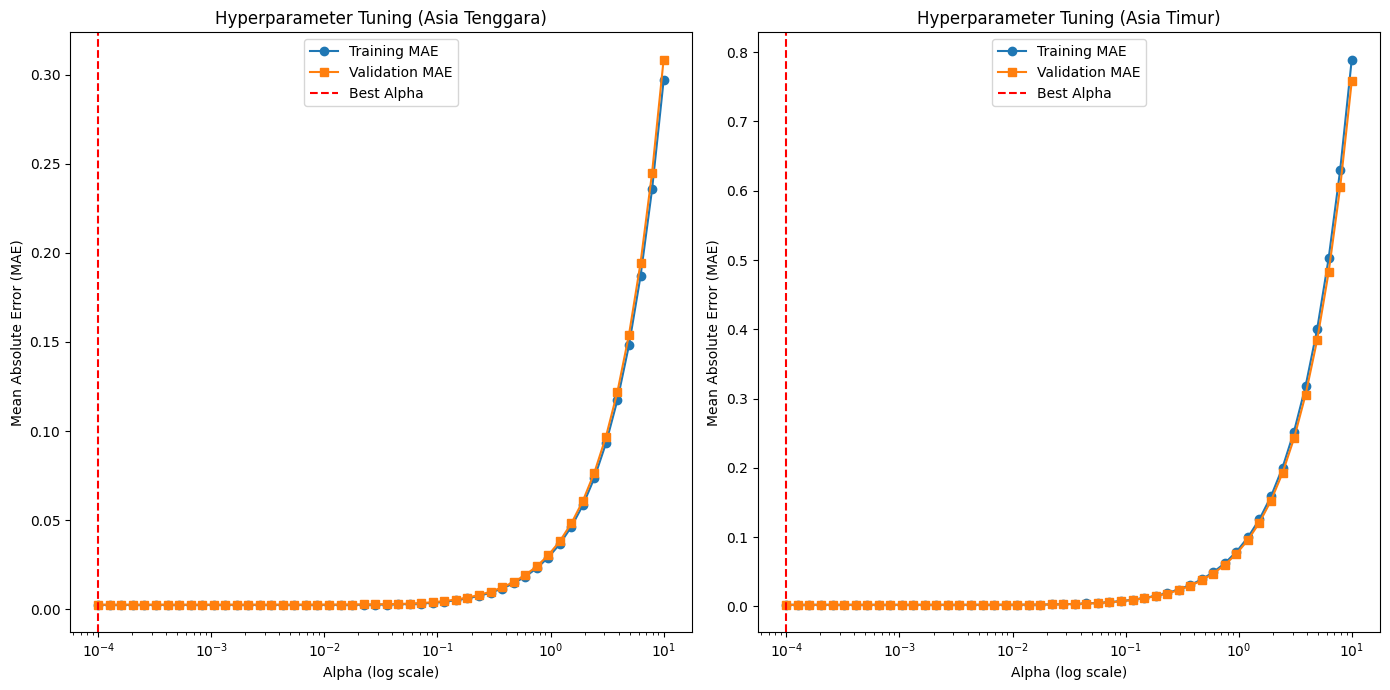

In [ ]:
# X_train1, X_test1, y_train1, y_test1 are for Asia Tenggara
# X_train2, X_test2, y_train2, y_test2 are for Asia Timur

scaler_tenggara = RobustScaler()
X_train1_scaled = scaler_tenggara.fit_transform(X_train1)
X_test1_scaled = scaler_tenggara.transform(X_test1)

scaler_timur = RobustScaler()
X_train2_scaled = scaler_timur.fit_transform(X_train2)
X_test2_scaled = scaler_timur.transform(X_test2)

# List of hyperparameter values for alpha
alphas = np.logspace(-4, 1, 50)  # From 0.0001 to 10

train_mae_tenggara, val_mae_tenggara = [], []
train_mae_timur, val_mae_timur = [], []

for alpha in alphas:
    ridge_tenggara = Ridge(alpha=alpha)
    ridge_tenggara.fit(X_train1_scaled, y_train1)
    y_train_pred_tenggara = ridge_tenggara.predict(X_train1_scaled)
    y_val_pred_tenggara = ridge_tenggara.predict(X_test1_scaled)
    train_mae_tenggara.append(mean_absolute_error(y_train1, y_train_pred_tenggara))
    val_mae_tenggara.append(mean_absolute_error(y_test1, y_val_pred_tenggara))

for alpha in alphas:
    ridge_timur = Ridge(alpha=alpha)
    ridge_timur.fit(X_train2_scaled, y_train2)
    y_train_pred_timur = ridge_timur.predict(X_train2_scaled)
    y_val_pred_timur = ridge_timur.predict(X_test2_scaled)
    train_mae_timur.append(mean_absolute_error(y_train2, y_train_pred_timur))
    val_mae_timur.append(mean_absolute_error(y_test2, y_val_pred_timur))

plt.figure(figsize=(14, 7))

# Asia Tenggara
plt.subplot(1, 2, 1)
plt.plot(alphas, train_mae_tenggara, label='Training MAE', marker='o')
plt.plot(alphas, val_mae_tenggara, label='Validation MAE', marker='s')
plt.axvline(alphas[np.argmin(val_mae_tenggara)], color='red', linestyle='--', label='Best Alpha')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Hyperparameter Tuning (Asia Tenggara)')
plt.legend()

# Asia Timur
plt.subplot(1, 2, 2)
plt.plot(alphas, train_mae_timur, label='Training MAE', marker='o')
plt.plot(alphas, val_mae_timur, label='Validation MAE', marker='s')
plt.axvline(alphas[np.argmin(val_mae_timur)], color='red', linestyle='--', label='Best Alpha')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Hyperparameter Tuning (Asia Timur)')
plt.legend()

plt.tight_layout()
plt.show()

##### GridSearchCV

Dipilih berdasarkan metrik MAE dan RMSE

In [ ]:
# Set seeds for consistency
np.random.seed(42)
random.seed(42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(rmse, greater_is_better=False)
}

# Define hyperparameter grid
param_grid = {'ridge__alpha': np.arange(0, 1.01, 0.01)}

model = Pipeline([
    ('scaler', RobustScaler()),  # Scaling with RobustScaler
    ('ridge', Ridge())
])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Grid search for Asia Tenggara
search_tenggara = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='RMSE', cv=cv, n_jobs=-1)
search_tenggara.fit(X_train1, y_train1)

# Grid search for Asia Timur
search_timur = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='RMSE', cv=cv, n_jobs=-1)
search_timur.fit(X_train2, y_train2)

print("Best Hyperparameters for Asia Tenggara:", search_tenggara.best_params_)
print("Best MAE for Asia Tenggara: %.3f" % -search_tenggara.cv_results_['mean_test_MAE'][search_tenggara.best_index_])
print("Best RMSE for Asia Tenggara: %.3f" % -search_tenggara.best_score_)

print("Best Hyperparameters for Asia Timur:", search_timur.best_params_)
print("Best MAE for Asia Timur: %.3f" % -search_timur.cv_results_['mean_test_MAE'][search_timur.best_index_])
print("Best RMSE for Asia Timur: %.3f" % -search_timur.best_score_)

Best Hyperparameters for Asia Tenggara: {'ridge__alpha': 0.0}
Best MAE for Asia Tenggara: 0.002
Best RMSE for Asia Tenggara: 0.003
Best Hyperparameters for Asia Timur: {'ridge__alpha': 0.0}
Best MAE for Asia Timur: 0.003
Best RMSE for Asia Timur: 0.003


##### RidgeCV

Dipilih berdasarkan metrik MAE dan RMSE

In [ ]:
np.random.seed(42)
random.seed(42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define alphas and evaluation method
alphas = np.arange(0, 1.01, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

pipeline_mae = Pipeline([
    ('scaler', RobustScaler()),
    ('ridge', RidgeCV(alphas=alphas, scoring=make_scorer(mean_absolute_error, greater_is_better=False), cv=cv))
])

pipeline_rmse = Pipeline([
    ('scaler', RobustScaler()),
    ('ridge', RidgeCV(alphas=alphas, scoring=make_scorer(rmse, greater_is_better=False), cv=cv))
])

# Fit RidgeCV for MAE
pipeline_mae.fit(X_train1, y_train1)
pipeline_mae_timur = Pipeline(steps=pipeline_mae.steps)
pipeline_mae_timur.fit(X_train2, y_train2)

# Fit RidgeCV for RMSE
pipeline_rmse.fit(X_train1, y_train1)
pipeline_rmse_timur = Pipeline(steps=pipeline_rmse.steps)
pipeline_rmse_timur.fit(X_train2, y_train2)

ridge_mae = pipeline_mae.named_steps['ridge']
ridge_mae_timur = pipeline_mae_timur.named_steps['ridge']
print("Best alpha for Asia Tenggara (MAE):", ridge_mae.alpha_)
print("Best alpha for Asia Timur (MAE):", ridge_mae_timur.alpha_)

ridge_rmse = pipeline_rmse.named_steps['ridge']
ridge_rmse_timur = pipeline_rmse_timur.named_steps['ridge']
print("Best alpha for Asia Tenggara (RMSE):", ridge_rmse.alpha_)
print("Best alpha for Asia Timur (RMSE):", ridge_rmse_timur.alpha_)

Best alpha for Asia Tenggara (MAE): 0.0
Best alpha for Asia Timur (MAE): 0.0
Best alpha for Asia Tenggara (RMSE): 0.0
Best alpha for Asia Timur (RMSE): 0.0


---
**Solver: auto**

Dipilih solver auto karena hasil cross-validation menunjukkan bahwa solver ini menghasilkan kinerja yang optimal dengan nilai MSE, RMSE, MAE, dan MAPE yang identik dengan solver lain seperti svd, cholesky, dan lsqr, yang juga memberikan performa terbaik. Selain itu, solver auto memiliki keunggulan utama dalam fleksibilitasnya, karena secara otomatis memilih algoritma terbaik berdasarkan sifat data. Ini membuat solver auto lebih andal untuk digunakan dalam berbagai kondisi data tanpa memerlukan intervensi manual, sehingga memberikan efisiensi dalam proses pemodelan.

---
**alpha: 0.01**

Hasil GridSearchCV dan RidgeCV menunjukkan bahwa nilai parameter terbaik untuk alpha adalah **0**. Namun, ketika alpha = 0, Ridge Regression menjadi identik dengan Linear Regression, karena tidak ada regularisasi yang diterapkan.

Untuk tetap memanfaatkan manfaat regularisasi Ridge Regression, nilai alpha dipilih sedikit di atas 0, yaitu **0.01**. Dengan alpha = 0.01, Ridge Regression dapat mengurangi overfitting dan memberikan solusi yang lebih stabil, sekaligus tetap mempertahankan model yang hampir optimal.


### Best Model: Ridge Regression with Tuning Parameter (solver: auto, alpha=0.01)

##### Modeling

Model Tersimpan: model_tenggara dan model_timur

In [ ]:
# Function untuk evaluasi best model dan menyimpan model yang dilatih
def evaluate_and_save_best_model_ridge(alpha, X_train, X_test, y_train, y_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'metrics': {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R^2': r2},
        'model': model
    }

# Hyperparameter tuning results
best_alpha_tenggara = 0.01
best_alpha_timur = 0.01

results_tenggara = evaluate_and_save_best_model_ridge(best_alpha_tenggara, X_train1, X_test1, y_train1, y_test1)
metrics_tenggara = results_tenggara['metrics']
model_tenggara = results_tenggara['model']

results_timur = evaluate_and_save_best_model_ridge(best_alpha_timur, X_train2, X_test2, y_train2, y_test2)
metrics_timur = results_timur['metrics']
model_timur = results_timur['model']

df_results_tenggara = pd.DataFrame([metrics_tenggara], index=['Ridge Regression'])
df_results_timur = pd.DataFrame([metrics_timur], index=['Ridge Regression'])

print("Model Evaluation Results for Asia Tenggara (Best Model Ridge Regression):")
display(df_results_tenggara)

print("\nModel Evaluation Results for Asia Timur (Best Model Ridge Regression):")
display(df_results_timur)

Model Evaluation Results for Asia Tenggara (Best Model Ridge Regression):


MSE   RMSE       MAE      MAPE  R^2
Ridge Regression  0.000009  0.003  0.002589  0.000031  1.0


Model Evaluation Results for Asia Timur (Best Model Ridge Regression):


MSE      RMSE      MAE      MAPE  R^2
Ridge Regression  0.000009  0.002988  0.00252  0.000032  1.0

##### Cross Validation (KFold)

In [ ]:
def evaluate_model_with_kfold_cv(alpha, X, y, kf):
    mse_scores = []
    r2_scores = []
    mae_scores = []
    mape_scores = []

    # KFold Cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = Ridge(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        mse_scores.append(mean_squared_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_val, y_pred))

    metrics = {
        'MSE': np.mean(mse_scores),
        'MSE_std': np.std(mse_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'RMSE_std': np.std(np.sqrt(np.array(mse_scores))),
        'MAE': np.mean(mae_scores),
        'MAE_std': np.std(mae_scores),
        'MAPE': np.mean(mape_scores),
        'MAPE_std': np.std(mape_scores),
        'R^2': np.mean(r2_scores),
        'R^2_std': np.std(r2_scores)
    }

    return metrics

# KFold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Alpha from hyperparameter tuning
best_alpha_tenggara = 0.01
best_alpha_timur = 0.01

# Asia Tenggara
results_tenggara_kfold = evaluate_model_with_kfold_cv(best_alpha_tenggara, X_train1.values, y_train1.values, kf)

# Asia Timur
results_timur_kfold = evaluate_model_with_kfold_cv(best_alpha_timur, X_train2.values, y_train2.values, kf)

df_results_tenggara_kfold = pd.DataFrame([results_tenggara_kfold], index=['Ridge Regression'])
df_results_timur_kfold = pd.DataFrame([results_timur_kfold], index=['Ridge Regression'])

print("Model Evaluation Results for Asia Tenggara (with KFold Cross-Validation):")
display(df_results_tenggara_kfold)

print("\nModel Evaluation Results for Asia Timur (with KFold Cross-Validation):")
display(df_results_timur_kfold)

Model Evaluation Results for Asia Tenggara (with KFold Cross-Validation):


MSE       MSE_std      RMSE  RMSE_std       MAE  \
Ridge Regression  0.000008  3.047240e-07  0.002914  0.000053  0.002504   

                   MAE_std      MAPE      MAPE_std  R^2       R^2_std  
Ridge Regression  0.000055  0.000029  7.988701e-07  1.0  4.343414e-10


Model Evaluation Results for Asia Timur (with KFold Cross-Validation):


MSE       MSE_std      RMSE  RMSE_std       MAE  \
Ridge Regression  0.00001  9.444103e-07  0.003174  0.000146  0.002687   

                   MAE_std      MAPE  MAPE_std  R^2       R^2_std  
Ridge Regression  0.000163  0.000032  0.000004  1.0  7.850002e-10

#### Hasil Hyperparam Lebih Baik

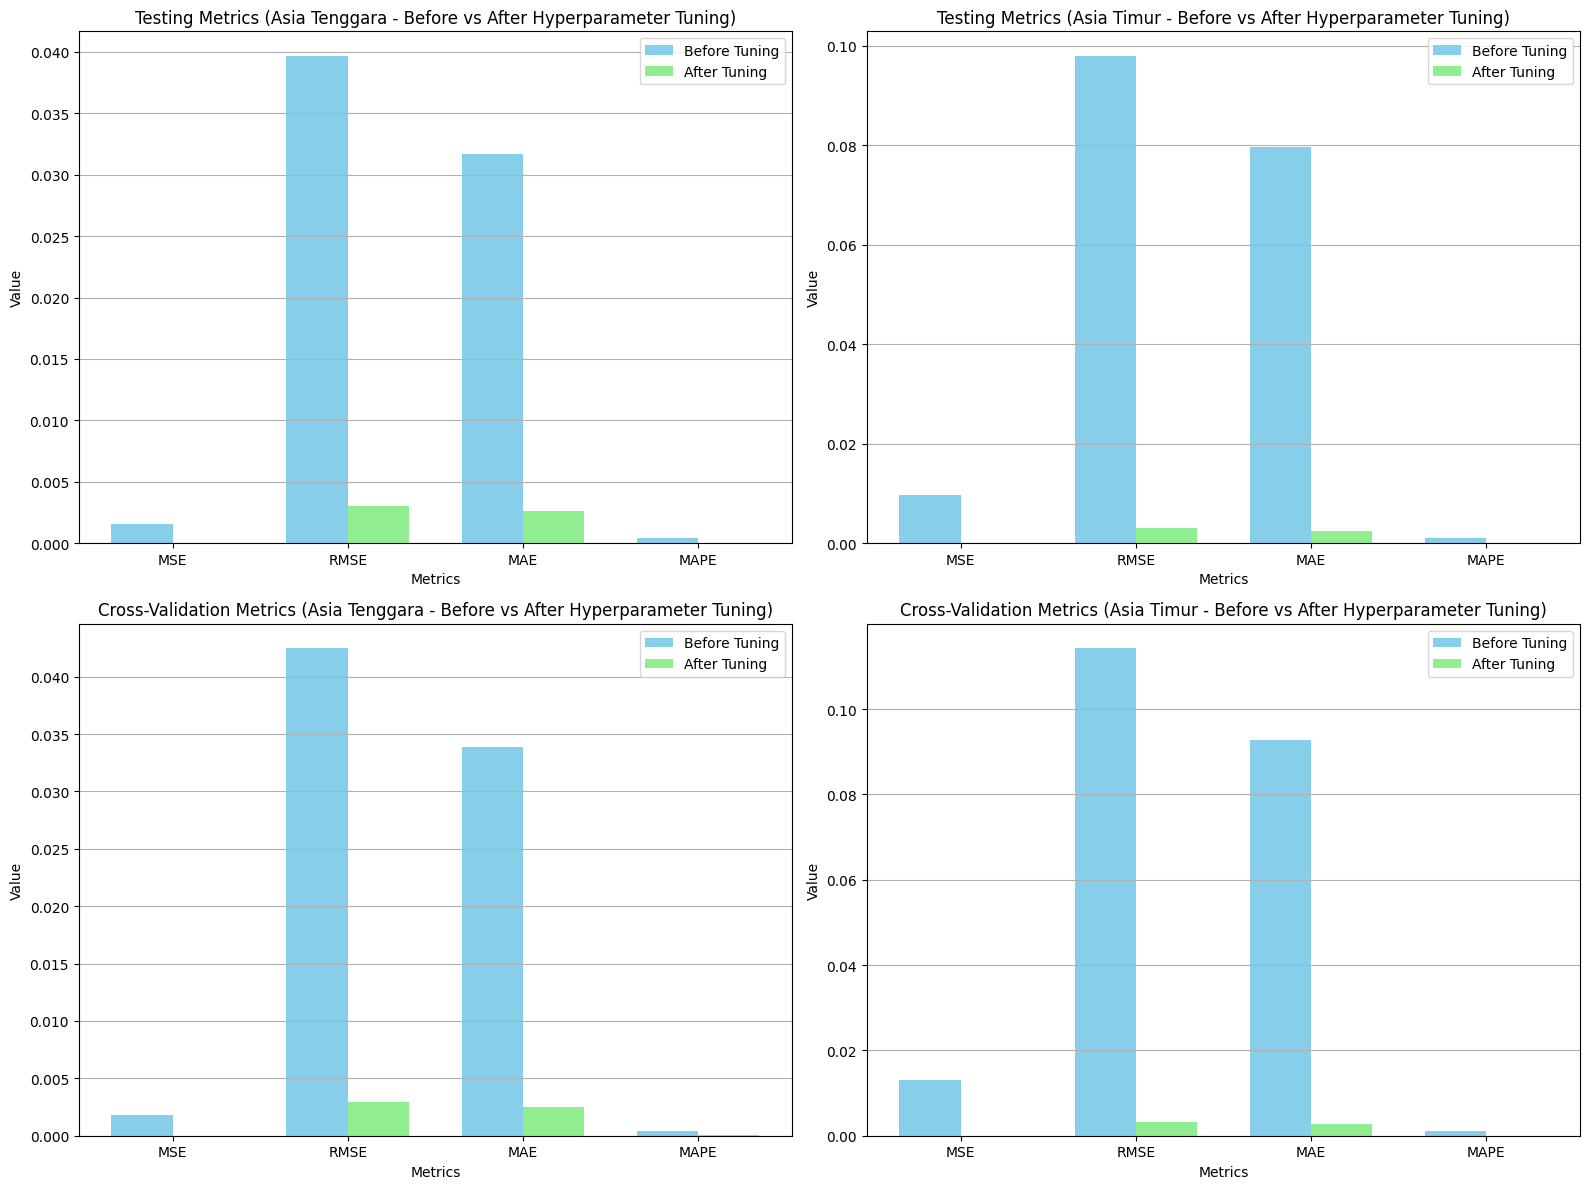

In [ ]:
# Evaluate Ridge Regression before tuning for both Asia Tenggara and Asia Timur
def evaluate_ridge_before_tuning(X_train, X_test, y_train, y_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ridge Regression with default alpha (1.0)
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R^2': r2}

results_tenggara_before = evaluate_ridge_before_tuning(X_train1.values, X_test1.values, y_train1.values, y_test1.values)
results_timur_before = evaluate_ridge_before_tuning(X_train2.values, X_test2.values, y_train2.values, y_test2.values)

df_results_tenggara_before = pd.DataFrame([results_tenggara_before], index=['Ridge Regression'])
df_results_timur_before = pd.DataFrame([results_timur_before], index=['Ridge Regression'])

# Cross-validation
def evaluate_ridge_cv_before_tuning(X, y, kf):
    mse_scores = []
    r2_scores = []
    mae_scores = []
    mape_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # Ridge Regression with default alpha (1.0)
        model = Ridge(alpha=1.0)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        mse_scores.append(mean_squared_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_val, y_pred))

    metrics = {
        'MSE': np.mean(mse_scores),
        'MSE_std': np.std(mse_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'RMSE_std': np.std(np.sqrt(np.array(mse_scores))),
        'MAE': np.mean(mae_scores),
        'MAE_std': np.std(mae_scores),
        'MAPE': np.mean(mape_scores),
        'MAPE_std': np.std(mape_scores),
        'R^2': np.mean(r2_scores),
        'R^2_std': np.std(r2_scores)
    }

    return metrics

# KFold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results_tenggara_cv_before = evaluate_ridge_cv_before_tuning(X_train1.values, y_train1.values, kf)
results_timur_cv_before = evaluate_ridge_cv_before_tuning(X_train2.values, y_train2.values, kf)

df_results_tenggara_cv_before = pd.DataFrame([results_tenggara_cv_before], index=['Ridge Regression'])
df_results_timur_cv_before = pd.DataFrame([results_timur_cv_before], index=['Ridge Regression'])

metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']

testing_tenggara_before = df_results_tenggara_before.loc['Ridge Regression', metrics].values
testing_timur_before = df_results_timur_before.loc['Ridge Regression', metrics].values

cv_tenggara_before = df_results_tenggara_cv_before.loc['Ridge Regression', metrics].values
cv_timur_before = df_results_timur_cv_before.loc['Ridge Regression', metrics].values

fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=100, sharey=False)
x = np.arange(len(metrics))
width = 0.35

# Asia Tenggara Testing Metrics Before vs After Tuning
testing_tenggara_before = df_results_tenggara_before.loc['Ridge Regression', metrics].values
testing_tenggara_after = df_results_tenggara.loc['Ridge Regression', metrics].values
axs[0, 0].bar(x - width / 2, testing_tenggara_before, width, label='Before Tuning', color='skyblue')
axs[0, 0].bar(x + width / 2, testing_tenggara_after, width, label='After Tuning', color='lightgreen')
axs[0, 0].set_title('Testing Metrics (Asia Tenggara - Before vs After Hyperparameter Tuning)')
axs[0, 0].set_xlabel('Metrics')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(metrics)
axs[0, 0].legend()
axs[0, 0].grid(axis='y')

# Asia Timur Testing Metrics Before vs After Tuning
testing_timur_before = df_results_timur_before.loc['Ridge Regression', metrics].values
testing_timur_after = df_results_timur.loc['Ridge Regression', metrics].values
axs[0, 1].bar(x - width / 2, testing_timur_before, width, label='Before Tuning', color='skyblue')
axs[0, 1].bar(x + width / 2, testing_timur_after, width, label='After Tuning', color='lightgreen')
axs[0, 1].set_title('Testing Metrics (Asia Timur - Before vs After Hyperparameter Tuning)')
axs[0, 1].set_xlabel('Metrics')
axs[0, 1].set_ylabel('Value')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(metrics)
axs[0, 1].legend()
axs[0, 1].grid(axis='y')

# Asia Tenggara Cross-Validation Metrics Before vs After Tuning
cv_tenggara_before = df_results_tenggara_cv_before.loc['Ridge Regression', metrics].values
cv_tenggara_after = df_results_tenggara_kfold.loc['Ridge Regression', metrics].values
axs[1, 0].bar(x - width / 2, cv_tenggara_before, width, label='Before Tuning', color='skyblue')
axs[1, 0].bar(x + width / 2, cv_tenggara_after, width, label='After Tuning', color='lightgreen')
axs[1, 0].set_title('Cross-Validation Metrics (Asia Tenggara - Before vs After Hyperparameter Tuning)')
axs[1, 0].set_xlabel('Metrics')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(metrics)
axs[1, 0].legend()
axs[1, 0].grid(axis='y')

# Asia Timur Cross-Validation Metrics Before vs After Tuning
cv_timur_before = df_results_timur_cv_before.loc['Ridge Regression', metrics].values
cv_timur_after = df_results_timur_kfold.loc['Ridge Regression', metrics].values
axs[1, 1].bar(x - width / 2, cv_timur_before, width, label='Before Tuning', color='skyblue')
axs[1, 1].bar(x + width / 2, cv_timur_after, width, label='After Tuning', color='lightgreen')
axs[1, 1].set_title('Cross-Validation Metrics (Asia Timur - Before vs After Hyperparameter Tuning)')
axs[1, 1].set_xlabel('Metrics')
axs[1, 1].set_ylabel('Value')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(metrics)
axs[1, 1].legend()
axs[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Table Comparison for Asia Tenggara
df_comparison_tenggara = pd.DataFrame({
    'Before Tuning': df_results_tenggara_before.loc['Ridge Regression', metrics + ['R^2']].values,
    'After Tuning': df_results_tenggara.loc['Ridge Regression', metrics + ['R^2']].values
}, index=metrics + ['R^2'])

# Table Comparison for Asia Timur
df_comparison_timur = pd.DataFrame({
    'Before Tuning': df_results_timur_before.loc['Ridge Regression', metrics + ['R^2']].values,
    'After Tuning': df_results_timur.loc['Ridge Regression', metrics + ['R^2']].values
}, index=metrics + ['R^2'])

print("Comparison Table for Asia Tenggara:")
display(df_comparison_tenggara)
print("\nComparison Table for Asia Timur:")
display(df_comparison_timur)

Comparison Table for Asia Tenggara:


Before Tuning  After Tuning
MSE        0.001576      0.000009
RMSE       0.039694      0.003000
MAE        0.031723      0.002589
MAPE       0.000406      0.000031
R^2        0.999999      1.000000


Comparison Table for Asia Timur:


Before Tuning  After Tuning
MSE        0.009604      0.000009
RMSE       0.097998      0.002988
MAE        0.079554      0.002520
MAPE       0.000953      0.000032
R^2        0.999994      1.000000

**Perbandingan Kinerja Ridge Regression Sebelum dan Sesudah Hyperparameter Tuning**

**1. Hasil Evaluasi pada Data Testing**
- Grafik di sebelah kiri menunjukkan perbandingan kinerja model Ridge Regression **sebelum** dan **sesudah** hyperparameter tuning pada data testing.
- **Metrik MSE, RMSE, MAE, dan MAPE** menunjukkan penurunan yang signifikan setelah tuning:
  - **MSE**: Menurun, menandakan bahwa error kuadrat rata-rata menjadi lebih kecil.
  - **RMSE**: Menurun, mencerminkan pengurangan dalam deviasi error.
  - **MAE**: Berkurang, menunjukkan prediksi lebih akurat terhadap nilai sebenarnya.
  - **MAPE**: Menurun, artinya model menjadi lebih akurat dalam persentase kesalahan prediksi.

**2. Hasil Evaluasi dengan Cross-Validation**
- Grafik di sebelah kanan menunjukkan kinerja model Ridge Regression **sebelum** dan **sesudah** hyperparameter tuning berdasarkan evaluasi dengan cross-validation.
- Hasil menunjukkan tren serupa dengan data testing, yaitu penurunan yang signifikan pada metrik error:
  - **MSE dan RMSE** menunjukkan bahwa model setelah tuning memiliki error yang jauh lebih kecil dan lebih konsisten di setiap fold.
  - **MAE dan MAPE** juga mengalami pengurangan, menunjukkan prediksi yang lebih presisi dalam cross-validation.

**Kesimpulan**
- **Hyperparameter tuning** berhasil meningkatkan kinerja model Ridge Regression, baik pada data testing maupun evaluasi cross-validation.
- Model menjadi lebih akurat, stabil, dan menghasilkan prediksi dengan error yang lebih kecil.
- Dengan nilai error yang lebih rendah dan peningkatan stabilitas, model setelah tuning lebih dapat diandalkan untuk memprediksi data baru.


#### Plot Residual

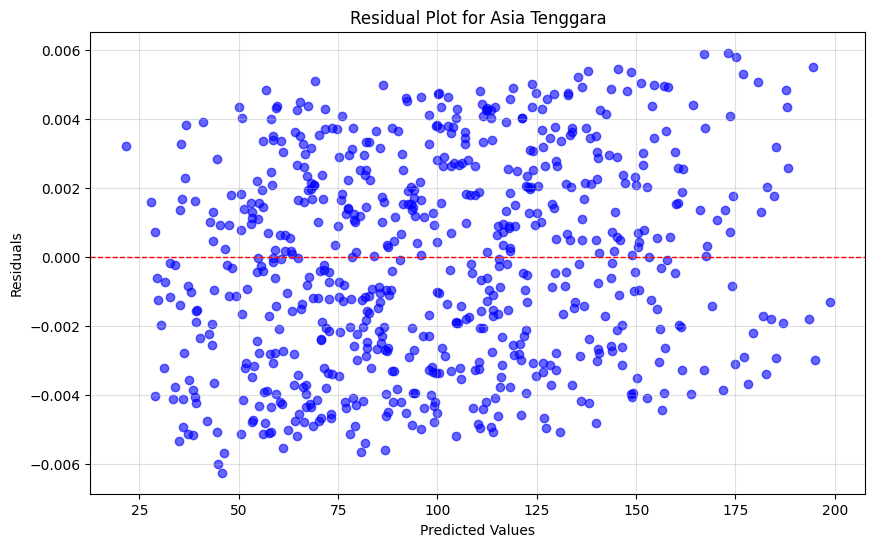

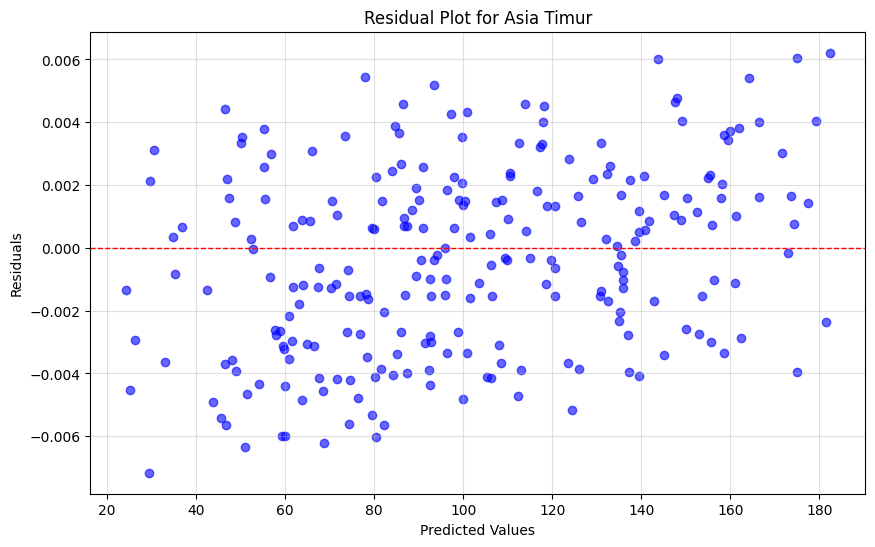

In [ ]:
def plot_residuals(model, X_train, X_test, y_train, y_test, title):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Residual Plot for {title}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(alpha=0.4)
    plt.show()

plot_residuals(model_tenggara, X_train1, X_test1, y_train1, y_test1, "Asia Tenggara")
plot_residuals(model_timur, X_train2, X_test2, y_train2, y_test2, "Asia Timur")

**Interpretasi Residual Plots**

Residual plots untuk Ridge Regression di Asia Tenggara dan Asia Timur memberikan wawasan penting mengenai performa model yang digunakan untuk memprediksi AQI Index.

---

**1. Pola Residual**
- **Asia Tenggara**:
  - Residual tersebar secara acak di sekitar garis nol, tanpa pola yang jelas.
  - Tidak ada indikasi pola sistematis seperti kurva atau tren yang terlihat.
  - Ini menunjukkan bahwa model Ridge Regression di Asia Tenggara berhasil menangkap hubungan antara fitur dan AQI dengan baik.
  - Meski demikian, terdapat beberapa titik residual yang lebih besar, yang mengindikasikan adanya prediksi dengan error lebih tinggi pada beberapa data tertentu.

- **Asia Timur**:
  - Residual juga tersebar secara acak di sekitar garis nol, tanpa pola yang jelas.
  - Tidak ada tren atau kurva yang menunjukkan adanya bias sistematik dalam prediksi.
  - Ini menunjukkan bahwa model Ridge Regression di Asia Timur juga berhasil menangkap hubungan antara fitur dan AQI dengan baik.
  - Beberapa titik residual yang lebih besar dapat menunjukkan kesalahan prediksi pada beberapa data, tetapi kesalahan tersebut tidak konsisten.

---

**2. Rentang Residual**
- **Asia Tenggara**:
  - Sebagian besar residual berada di sekitar garis nol, menunjukkan bahwa error model cukup kecil secara keseluruhan, meskipun ada beberapa error lebih besar pada beberapa titik data.

- **Asia Timur**:
  - Rentang residual juga menunjukkan bahwa sebagian besar error model relatif kecil dan terkonsentrasi dekat garis nol.

---

**3. Kesimpulan**
1. **Model Fit yang Baik**:
   - Pola residual yang acak dan tidak menunjukkan tren apapun menandakan bahwa model Ridge Regression berhasil menangkap hubungan antara fitur dan AQI dengan baik di kedua wilayah.
   - Tidak ditemukan indikasi adanya overfitting atau underfitting pada distribusi residual.

2. **Error Stabil**:
   - Error prediksi tersebar merata di seluruh rentang nilai AQI, meskipun terdapat beberapa error lebih besar di titik data tertentu.
   - Secara keseluruhan, model menunjukkan performa yang baik dalam memprediksi AQI dengan error yang relatif kecil di kedua wilayah.


### [No. 3] Analisis Model Terbaik

3. Faktor mana yang paling signifikan dalam memengaruhi AQI di kedua wilayah?

#### Feature Importance

Feature Importance for Asia Tenggara:


Feature  Coefficient
0          Pollutant_PM2.5_µg/m³    44.666800
1           Pollutant_PM10_µg/m³    30.947044
6               Pollutant_O3_ppb    13.193339
4              Pollutant_NO2_ppb     6.581976
8               Pollutant_CO_ppm     2.361341
5              Pollutant_SO2_ppb     2.323943
7                     Humidity_%     0.000144
2   PopulationDensity_people/km²     0.000099
11       SensorLocation_Suburban     0.000097
9    RenewableEnergyPercentage_%    -0.000001
12          SensorLocation_Urban    -0.000020
3         UrbanVegetationArea_m2    -0.000076
10          SensorLocation_Rural    -0.000573


Feature Importance for Asia Timur:


Feature  Coefficient
0          Pollutant_PM2.5_µg/m³    45.267380
1           Pollutant_PM10_µg/m³    29.690588
6               Pollutant_O3_ppb    12.650262
4              Pollutant_NO2_ppb     6.852645
5              Pollutant_SO2_ppb     2.318335
8               Pollutant_CO_ppm     2.289955
3         UrbanVegetationArea_m2     0.000338
11       SensorLocation_Suburban     0.000318
7                     Humidity_%     0.000178
12          SensorLocation_Urban     0.000119
2   PopulationDensity_people/km²    -0.000048
9    RenewableEnergyPercentage_%    -0.000354
10          SensorLocation_Rural    -0.001864

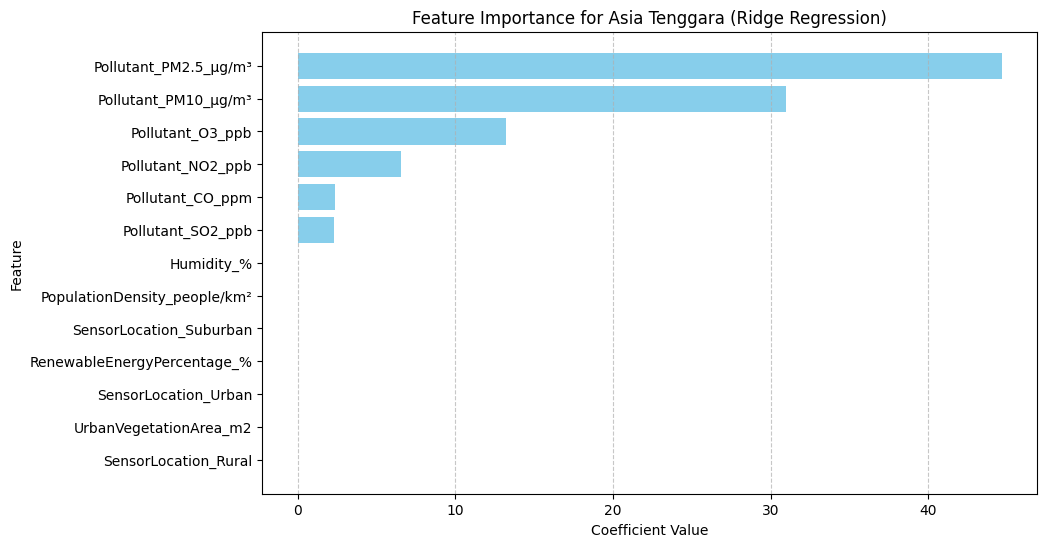

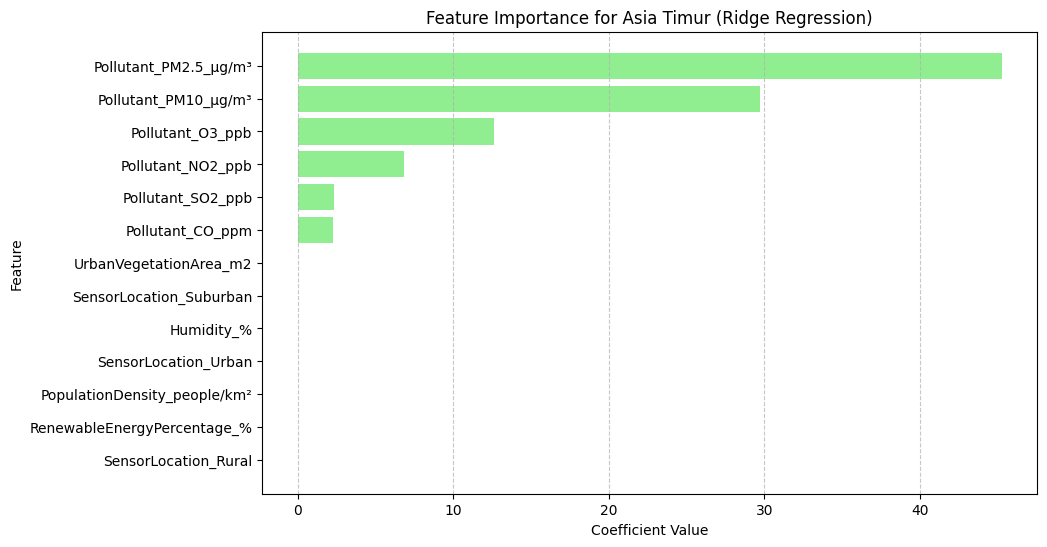

In [ ]:
def extract_feature_importance(model, feature_names):
    coefficients = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    return feature_importance

feature_names = X_train1.columns

# Feature importance for Asia Tenggara
feature_importance_tenggara = extract_feature_importance(model_tenggara, feature_names)
print("Feature Importance for Asia Tenggara:")
display(feature_importance_tenggara)

# Feature importance for Asia Timur
feature_importance_timur = extract_feature_importance(model_timur, feature_names)
print("\nFeature Importance for Asia Timur:")
display(feature_importance_timur)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_tenggara['Feature'], feature_importance_tenggara['Coefficient'], color='skyblue')
plt.title('Feature Importance for Asia Tenggara (Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_timur['Feature'], feature_importance_timur['Coefficient'], color='lightgreen')
plt.title('Feature Importance for Asia Timur (Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Interpretasi Feature Importance**

Dari hasil **Feature Importance** di kedua wilayah, kita dapat melihat faktor-faktor yang paling signifikan dalam memengaruhi **AQI_Index**. Berikut adalah analisis berdasarkan hasil tersebut:

---

**1. Faktor Paling Signifikan**

**Asia Tenggara:**
- **Faktor Dominan:**
  - **`Pollutant_PM2.5_µg/m³` (44.667):** Faktor ini memiliki pengaruh terbesar terhadap AQI di Asia Tenggara.
  - **`Pollutant_PM10_µg/m³` (30.947):** PM10 menjadi faktor kedua yang signifikan.
  - **`Pollutant_O3_ppb` (13.193):** Meski kontribusinya lebih kecil dibandingkan PM2.5 dan PM10, ozon tetap menjadi faktor penting.

- **Faktor dengan Pengaruh Rendah:**
  - Fitur seperti **UrbanVegetationArea_m2** (-0.000089), **RenewableEnergyPercentage_%** (0.000050), dan **Humidity_%** (0.000048) memiliki pengaruh yang sangat kecil terhadap AQI.
  - Variabel kategorik seperti **`SensorLocation`** memiliki pengaruh yang hampir tidak signifikan.

---

**Asia Timur:**
- **Faktor Dominan:**
  - **`Pollutant_PM2.5_µg/m³` (45.268):** PM2.5 tetap menjadi faktor utama yang memengaruhi AQI di Asia Timur.
  - **`Pollutant_PM10_µg/m³` (29.691):** PM10 juga memberikan kontribusi besar terhadap AQI.
  - **`Pollutant_O3_ppb` (12.650):** Ozon menjadi faktor ketiga yang signifikan.

- **Faktor dengan Pengaruh Rendah:**
  - Variabel seperti **UrbanVegetationArea_m2** (0.000309), **RenewableEnergyPercentage_%** (-0.000123), dan **Humidity_%** (0.000029) memiliki pengaruh kecil terhadap AQI.
  - Variabel kategorik seperti **`SensorLocation`** juga memiliki pengaruh yang hampir tidak signifikan.

---

**2. Perbandingan Antara Asia Tenggara dan Asia Timur**

| **Faktor Utama**                 | **Asia Tenggara (Coefficient)** | **Asia Timur (Coefficient)** | **Komentar**                                       |
|----------------------------------|---------------------------------|------------------------------|---------------------------------------------------|
| **`Pollutant_PM2.5_µg/m³`**      | 44.667                          | 45.268                       | Faktor dominan di kedua wilayah, sedikit lebih signifikan di Asia Timur. |
| **`Pollutant_PM10_µg/m³`**       | 30.947                          | 29.691                       | Faktor kedua di kedua wilayah, lebih signifikan di Asia Tenggara. |
| **`Pollutant_O3_ppb`**           | 13.193                          | 12.650                       | Faktor ketiga yang signifikan, mirip di kedua wilayah. |
| **UrbanVegetationArea_m2**       | -0.000089                       | 0.000309                     | Pengaruh sangat kecil di kedua wilayah, sedikit lebih signifikan di Asia Timur. |
| **RenewableEnergyPercentage_%**  | 0.000050                        | -0.000123                    | Pengaruh kecil di kedua wilayah, berbeda arah antara wilayah. |

---

**3. Interpretasi Hasil**
1. **PM2.5 dan PM10 adalah Faktor Utama:**
   - Konsentrasi **PM2.5** dan **PM10** adalah penyebab utama penurunan kualitas udara di kedua wilayah.
   - Asia Timur memiliki sensitivitas yang sedikit lebih tinggi terhadap PM2.5 dibandingkan Asia Tenggara.

2. **Pengaruh Faktor Lain Sangat Rendah:**
   - Faktor seperti vegetasi urban (**UrbanVegetationArea_m2**) dan kebijakan energi (**RenewableEnergyPercentage_%**) memiliki pengaruh minimal terhadap AQI.
   - Variabel kategorik seperti **`SensorLocation`** memiliki dampak yang sangat kecil terhadap AQI.

---

**4. Kesimpulan**
- **Faktor Dominan:**
  - **PM2.5** adalah faktor paling signifikan di kedua wilayah, diikuti oleh **PM10**.
- **Perbedaan Antar Wilayah:**
  - Asia Timur menunjukkan sedikit sensitivitas yang lebih tinggi terhadap PM2.5 dibandingkan Asia Tenggara.
  - Asia Tenggara menunjukkan pengaruh yang sedikit lebih besar dari ozon (**Pollutant_O3_ppb**).
- **Faktor Minor:**
  - Faktor lain seperti vegetasi, kelembaban, dan kebijakan energi memiliki pengaruh kecil terhadap AQI.

---

**5. Rekomendasi**
1. **Asia Tenggara:**
   - Fokus pada pengurangan **PM2.5** dan **PM10** melalui regulasi emisi industri dan kendaraan.
   - Tingkatkan monitoring ozon sebagai faktor tambahan yang relevan.

2. **Asia Timur:**
   - Perkuat kebijakan pengendalian **PM2.5**, terutama di wilayah perkotaan dengan polusi tinggi.
   - Tingkatkan upaya vegetasi urban untuk mengurangi dampak polusi secara tidak langsung.

#### SHAP

In [ ]:
shap.initjs()

Asia Tenggara

In [ ]:
def scale_features(model, X_train, X_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return scaler, X_test_scaled

scaler_tenggara, X_test1_scaled = scale_features(model_tenggara, X_train1, X_test1)
scaler_timur, X_test2_scaled = scale_features(model_timur, X_train2, X_test2)

In [ ]:
X_test1_scaled = scaler_tenggara.transform(X_test1)  # Untuk Asia Tenggara
X_test2_scaled = scaler_timur.transform(X_test2)    # Untuk Asia Timur

feature_names = X_test1.columns
explainer_tenggara = shap.Explainer(model_tenggara, X_test1_scaled, feature_names=feature_names)
shap_values_tenggara = explainer_tenggara(X_test1_scaled)
explainer_timur = shap.Explainer(model_timur, X_test2_scaled, feature_names=feature_names)
shap_values_timur = explainer_timur(X_test2_scaled)

Asia Tenggara

In [ ]:
shap.plots.force(shap_values_tenggara[0, ...])

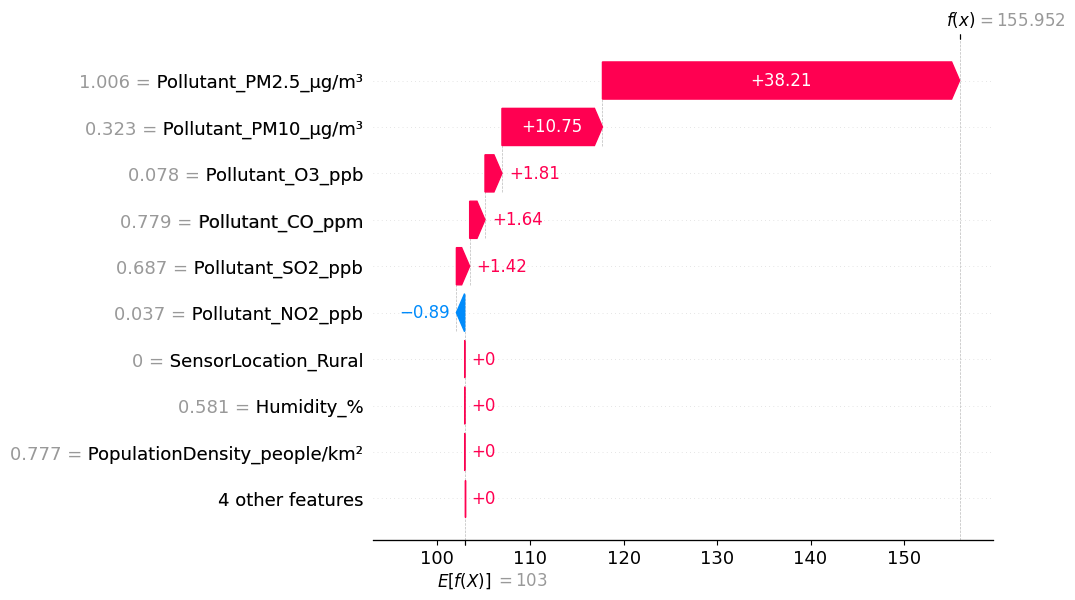

In [ ]:
shap.plots.waterfall(shap_values_tenggara[0])

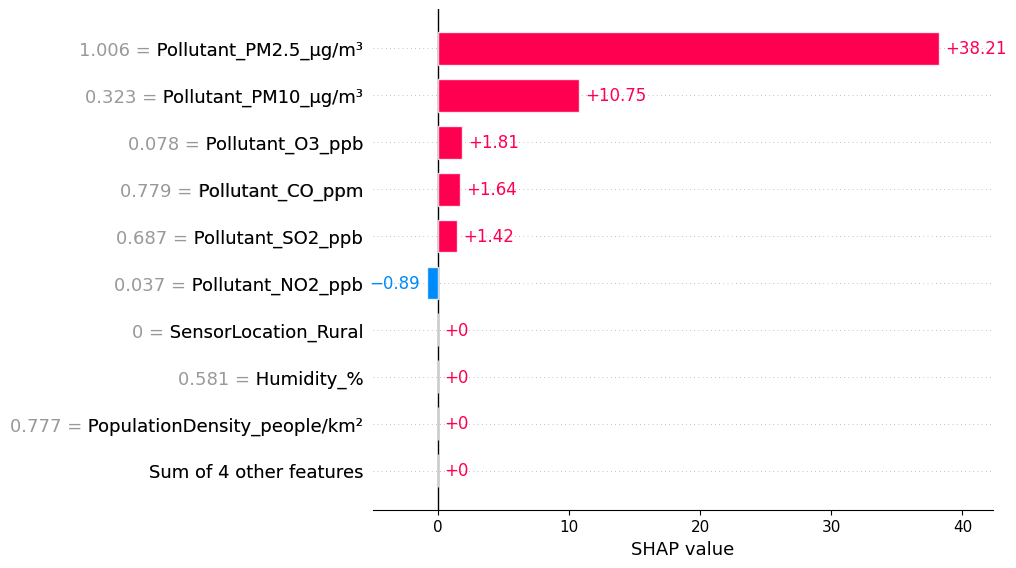

In [ ]:
shap.plots.bar(shap_values_tenggara[0])

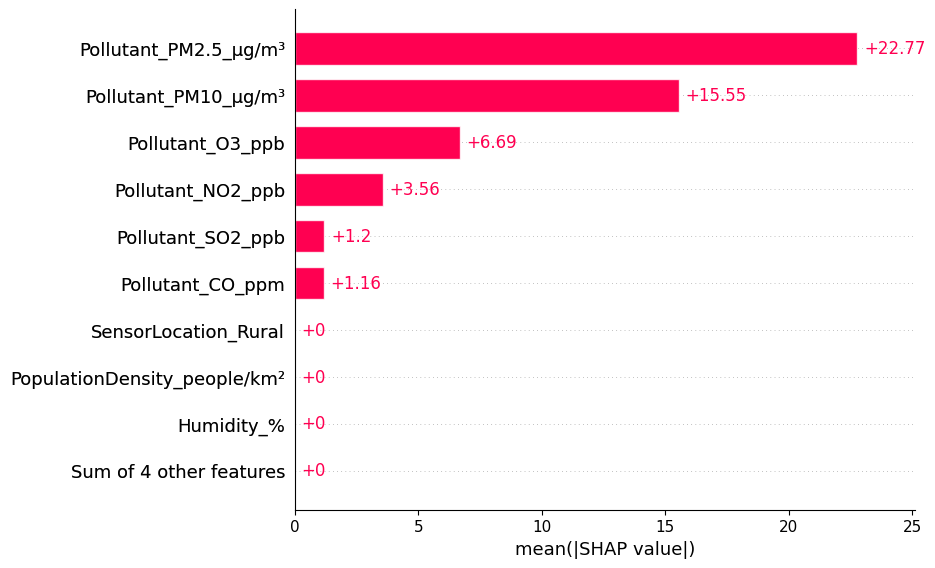

In [ ]:
shap.plots.bar(shap_values_tenggara)

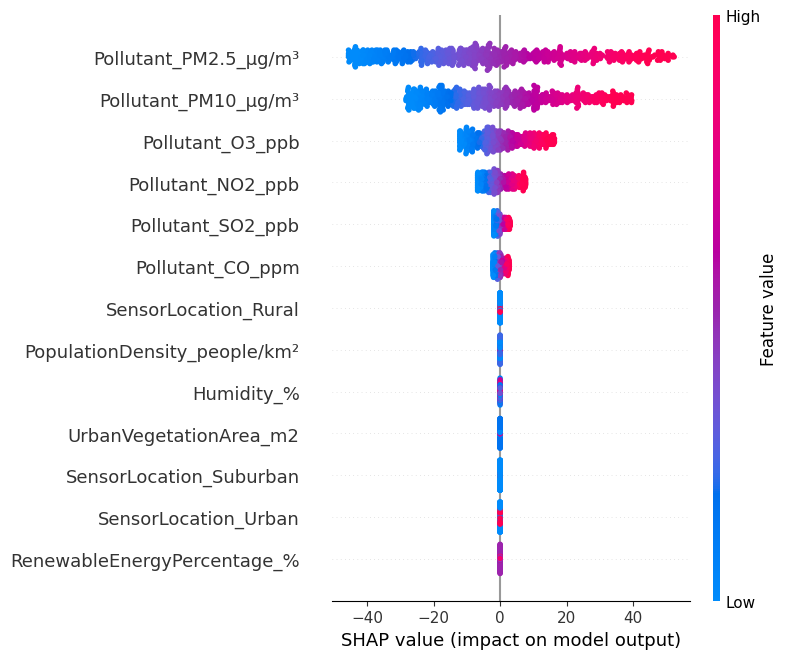

In [ ]:
shap.summary_plot(shap_values_tenggara, X_test1_scaled)

Asia Timur

In [ ]:
shap.plots.force(shap_values_timur[0, ...])

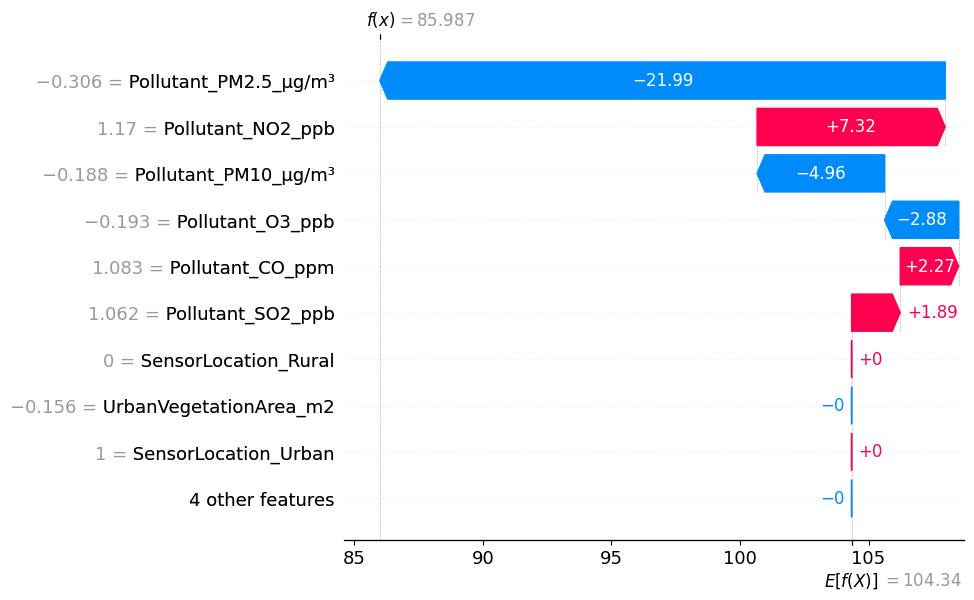

In [ ]:
shap.plots.waterfall(shap_values_timur[0])

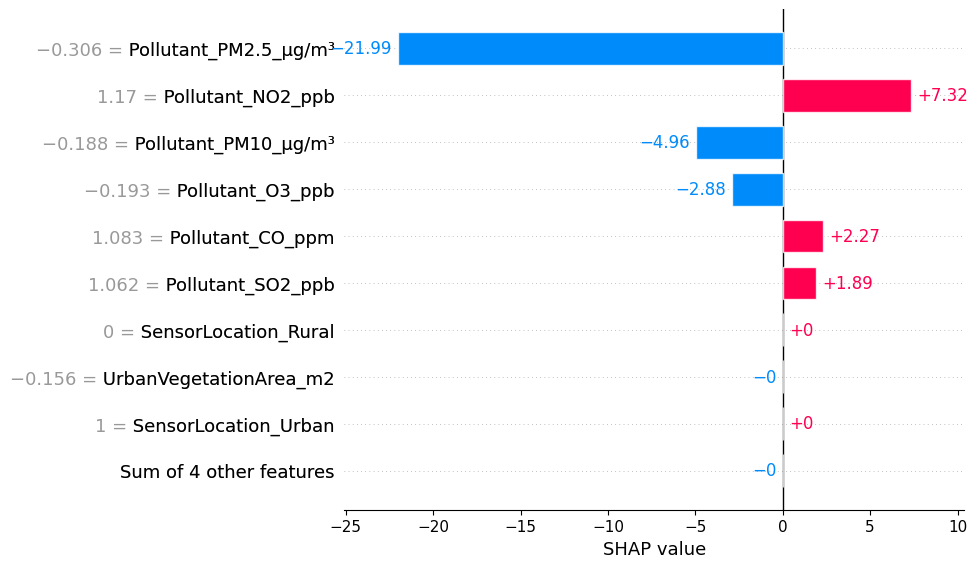

In [ ]:
shap.plots.bar(shap_values_timur[0])

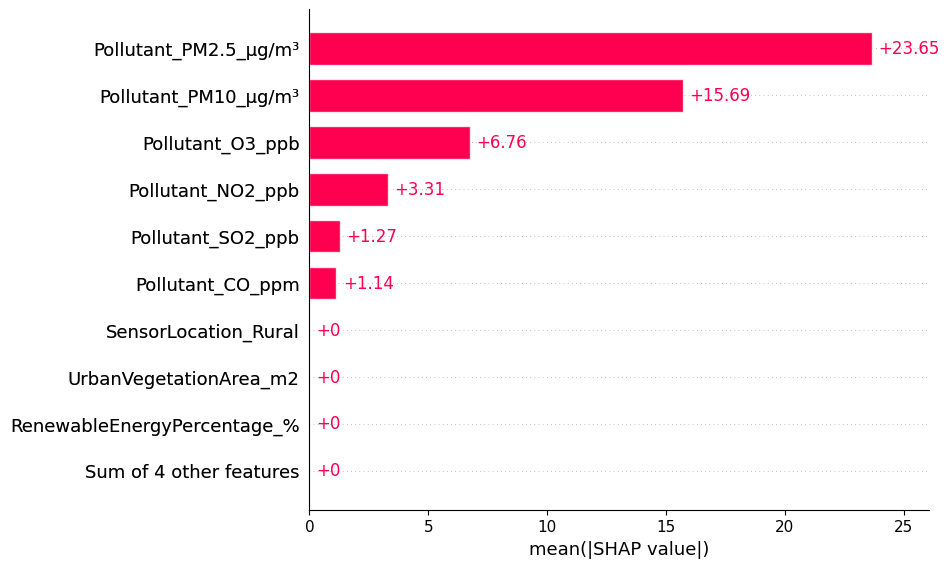

In [ ]:
shap.plots.bar(shap_values_timur)

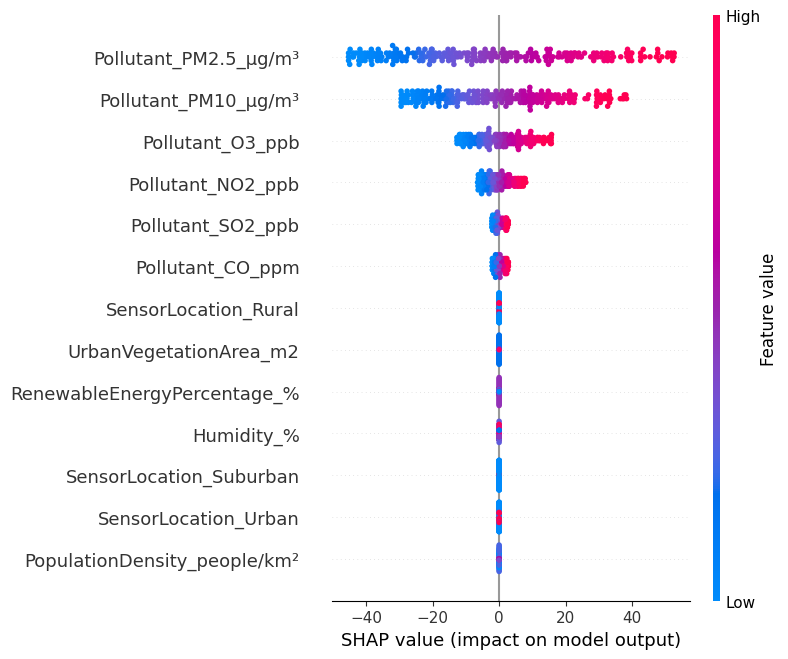

In [ ]:
shap.summary_plot(shap_values_timur, X_test2_scaled)

### [No. 4] Simulasi Kebijakan

4.	Bagaimana hasil prediksi Air Quality Index (AQI) dapat digunakan untuk menyusun simulasi kebijakan lingkungan yang efektif di wilayah Asia Tenggara dan Asia Timur?

#### Dash

Dash Asia Tenggara

In [ ]:
app = dash.Dash(__name__)

scaler_tenggara = RobustScaler()
X_test1_scaled = scaler_tenggara.fit_transform(X_test1)

app.layout = html.Div([
    html.H1("Simulasi Kebijakan Pengurangan AQI di Asia Tenggara"),

    # Slider untuk simulasi kebijakan
    html.Label("Pengurangan PM2.5 (%)"),
    dcc.Slider(id='slider-pm25', min=0, max=50, step=5, value=20),

    html.Label("Pengurangan PM10 (%)"),
    dcc.Slider(id='slider-pm10', min=0, max=50, step=5, value=20),

    html.Label("Pengurangan O3 (%)"),
    dcc.Slider(id='slider-o3', min=0, max=50, step=5, value=15),

    html.Label("Pengurangan NO2 (%)"),
    dcc.Slider(id='slider-no2', min=0, max=50, step=5, value=15),

    html.Label("Peningkatan Urban Vegetation (%)"),
    dcc.Slider(id='slider-vegetation', min=0, max=50, step=5, value=30),

    html.Label("Peningkatan Renewable Energy (%)"),
    dcc.Slider(id='slider-renewable', min=0, max=50, step=5, value=20),

    # Grafik interaktif
    dcc.Graph(id='graph-simulation'),
])

@app.callback(
    dash.dependencies.Output('graph-simulation', 'figure'),
    [
        dash.dependencies.Input('slider-pm25', 'value'),
        dash.dependencies.Input('slider-pm10', 'value'),
        dash.dependencies.Input('slider-o3', 'value'),
        dash.dependencies.Input('slider-no2', 'value'),
        dash.dependencies.Input('slider-vegetation', 'value'),
        dash.dependencies.Input('slider-renewable', 'value'),
    ]
)
def update_simulation(pm25_reduction, pm10_reduction, o3_reduction, no2_reduction, vegetation_increase, renewable_increase):
    # Simulasi kebijakan
    X_simulation = X_test1.copy()
    X_simulation['Pollutant_PM2.5_µg/m³'] *= (1 - pm25_reduction / 100)
    X_simulation['Pollutant_PM10_µg/m³'] *= (1 - pm10_reduction / 100)
    X_simulation['Pollutant_O3_ppb'] *= (1 - o3_reduction / 100)
    X_simulation['Pollutant_NO2_ppb'] *= (1 - no2_reduction / 100)
    X_simulation['UrbanVegetationArea_m2'] *= (1 + vegetation_increase / 100)
    X_simulation['RenewableEnergyPercentage_%'] *= (1 + renewable_increase / 100)

    X_simulation_scaled = scaler_tenggara.transform(X_simulation)
    y_pred_simulation = model_tenggara.predict(X_simulation_scaled)

    fig = px.histogram(
        x=y_pred_simulation,
        nbins=50,
        title="Distribusi AQI Setelah Kebijakan",
        labels={'x': "AQI", 'y': "Frequency"}
    )
    fig.update_layout(xaxis_title="AQI", yaxis_title="Frequency")
    return fig

# Jalankan aplikasi
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Dash Asia Timur

In [ ]:
# import dash
# from dash import dcc, html
# import plotly.express as px
# from sklearn.preprocessing import RobustScaler

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# # Scaling the test data
# scaler_timur = RobustScaler()
# X_test2_scaled = scaler_timur.fit_transform(X_test2)

# # Layout Dashboard
# app.layout = html.Div([
#     html.H1("Simulasi Kebijakan Pengurangan AQI di Asia Timur"),

#     # Slider untuk simulasi kebijakan
#     html.Label("Pengurangan PM2.5 (%)"),
#     dcc.Slider(id='slider-pm25', min=0, max=50, step=5, value=20),

#     html.Label("Pengurangan PM10 (%)"),
#     dcc.Slider(id='slider-pm10', min=0, max=50, step=5, value=20),

#     html.Label("Pengurangan O3 (%)"),
#     dcc.Slider(id='slider-o3', min=0, max=50, step=5, value=15),

#     html.Label("Pengurangan NO2 (%)"),
#     dcc.Slider(id='slider-no2', min=0, max=50, step=5, value=15),

#     html.Label("Peningkatan Urban Vegetation (%)"),
#     dcc.Slider(id='slider-vegetation', min=0, max=50, step=5, value=30),

#     html.Label("Peningkatan Renewable Energy (%)"),
#     dcc.Slider(id='slider-renewable', min=0, max=50, step=5, value=20),

#     # Grafik interaktif
#     dcc.Graph(id='graph-simulation'),
# ])

# # Callback untuk memperbarui grafik berdasarkan input
# @app.callback(
#     dash.dependencies.Output('graph-simulation', 'figure'),
#     [
#         dash.dependencies.Input('slider-pm25', 'value'),
#         dash.dependencies.Input('slider-pm10', 'value'),
#         dash.dependencies.Input('slider-o3', 'value'),
#         dash.dependencies.Input('slider-no2', 'value'),
#         dash.dependencies.Input('slider-vegetation', 'value'),
#         dash.dependencies.Input('slider-renewable', 'value'),
#     ]
# )
# def update_simulation(pm25_reduction, pm10_reduction, o3_reduction, no2_reduction, vegetation_increase, renewable_increase):
#     # Simulasi kebijakan
#     X_simulation = X_test2.copy()
#     X_simulation['Pollutant_PM2.5_µg/m³'] *= (1 - pm25_reduction / 100)
#     X_simulation['Pollutant_PM10_µg/m³'] *= (1 - pm10_reduction / 100)
#     X_simulation['Pollutant_O3_ppb'] *= (1 - o3_reduction / 100)
#     X_simulation['Pollutant_NO2_ppb'] *= (1 - no2_reduction / 100)
#     X_simulation['UrbanVegetationArea_m2'] *= (1 + vegetation_increase / 100)
#     X_simulation['RenewableEnergyPercentage_%'] *= (1 + renewable_increase / 100)

#     # Scaling the simulation data
#     X_simulation_scaled = scaler_timur.transform(X_simulation)

#     # Prediksi AQI berdasarkan kebijakan
#     y_pred_simulation = model_timur.predict(X_simulation_scaled)

#     # Buat grafik
#     fig = px.histogram(
#         x=y_pred_simulation,
#         nbins=50,
#         title="Distribusi AQI Setelah Kebijakan",
#         labels={'x': "AQI", 'y': "Frequency"}
#     )
#     fig.update_layout(xaxis_title="AQI", yaxis_title="Frequency")
#     return fig

# # Jalankan aplikasi
# if __name__ == '__main__':
#     app.run_server(debug=True)

<IPython.core.display.Javascript object>

#### Contoh Skenario

In [ ]:
def scale_features(model, X_train, X_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return scaler, X_test_scaled

scaler_tenggara, X_test1_scaled = scale_features(model_tenggara, X_train1, X_test1)

# Simulasi skenario untuk Asia Tenggara
X_test1_scenario = X_test1.copy()

# Simulasi: Penurunan PM2.5 sebesar 20% dan peningkatan Urban Vegetation sebesar 30%
X_test1_scenario['Pollutant_PM2.5_µg/m³'] *= 0.8  # 20% reduction
X_test1_scenario['Pollutant_PM10_µg/m³'] *= 0.85  # 15% reduction
X_test1_scenario['Pollutant_O3_ppb'] *= 0.85  # 15% reduction
X_test1_scenario['Pollutant_NO2_ppb'] *= 0.85  # 15% reduction
X_test1_scenario['UrbanVegetationArea_m2'] *= 1.3  # 30% increase
X_test1_scenario['RenewableEnergyPercentage_%'] *= 1.2  # 20% increase

# Scale the scenario data
X_test1_scenario_scaled = scaler_tenggara.transform(X_test1_scenario)

# Prediksi AQI untuk skenario
y_pred_scenario_tenggara = model_tenggara.predict(X_test1_scenario_scaled)

# Original predictions for comparison
y_pred_original_tenggara = model_tenggara.predict(X_test1_scaled)

# Perbandingan Hasil untuk Asia Tenggara
tenggara_comparison = pd.DataFrame({
    'Actual AQI': y_test1.values,
    'Predicted AQI (Original)': y_pred_original_tenggara,
    'Predicted AQI (Scenario)': y_pred_scenario_tenggara
})

print("Hasil Simulasi untuk Asia Tenggara:")
print(tenggara_comparison.head())

Hasil Simulasi untuk Asia Tenggara:
   Actual AQI  Predicted AQI (Original)  Predicted AQI (Scenario)
0      155.95                155.952102                129.361016
1       61.54                 61.539357                 51.830633
2       59.34                 59.341435                 50.609183
3       82.12                 82.121848                 67.613527
4      181.99                181.991718                150.088563


In [ ]:
scaler_timur, X_test2_scaled = scale_features(model_timur, X_train2, X_test2)

# Simulasi skenario untuk Asia Timur
X_test2_scenario = X_test2.copy()

# Simulasi: Penurunan PM2.5 sebesar 20% dan peningkatan Urban Vegetation sebesar 30%
X_test2_scenario['Pollutant_PM2.5_µg/m³'] *= 0.8  # 20% reduction
X_test2_scenario['Pollutant_PM10_µg/m³'] *= 0.85  # 15% reduction
X_test2_scenario['Pollutant_O3_ppb'] *= 0.85  # 15% reduction
X_test2_scenario['Pollutant_NO2_ppb'] *= 0.85  # 15% reduction
X_test2_scenario['UrbanVegetationArea_m2'] *= 1.3  # 30% increase
X_test2_scenario['RenewableEnergyPercentage_%'] *= 1.2  # 20% increase

# Scale the scenario data
X_test2_scenario_scaled = scaler_timur.transform(X_test2_scenario)

# Prediksi AQI untuk skenario
y_pred_scenario_timur = model_timur.predict(X_test2_scenario_scaled)

# Original predictions for comparison
y_pred_original_timur = model_timur.predict(X_test2_scaled)

# Perbandingan Hasil untuk Asia Timur
timur_comparison = pd.DataFrame({
    'Actual AQI': y_test2.values,
    'Predicted AQI (Original)': y_pred_original_timur,
    'Predicted AQI (Scenario)': y_pred_scenario_timur
})

print("Hasil Simulasi untuk Asia Timur:")
print(timur_comparison.head())

Hasil Simulasi untuk Asia Timur:
   Actual AQI  Predicted AQI (Original)  Predicted AQI (Scenario)
0       85.99                 85.987317                 73.111152
1       97.25                 97.245749                 82.327863
2      130.89                130.886650                108.998896
3      114.16                114.159462                 95.113964
4      105.36                105.364113                 87.777878


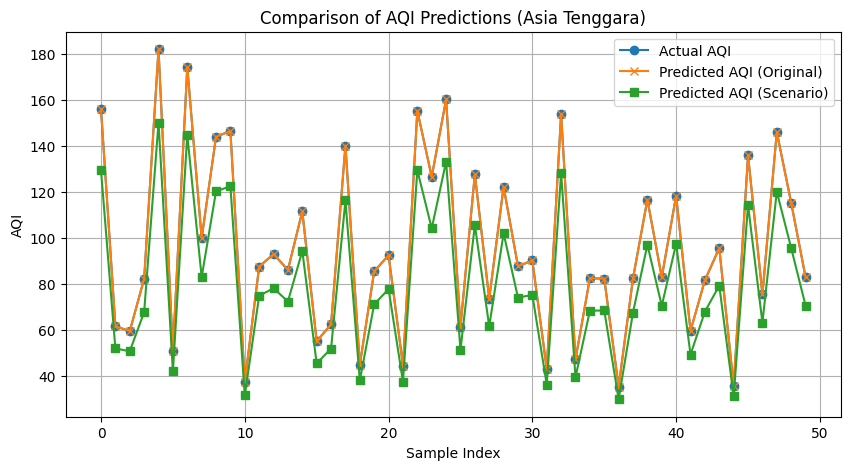

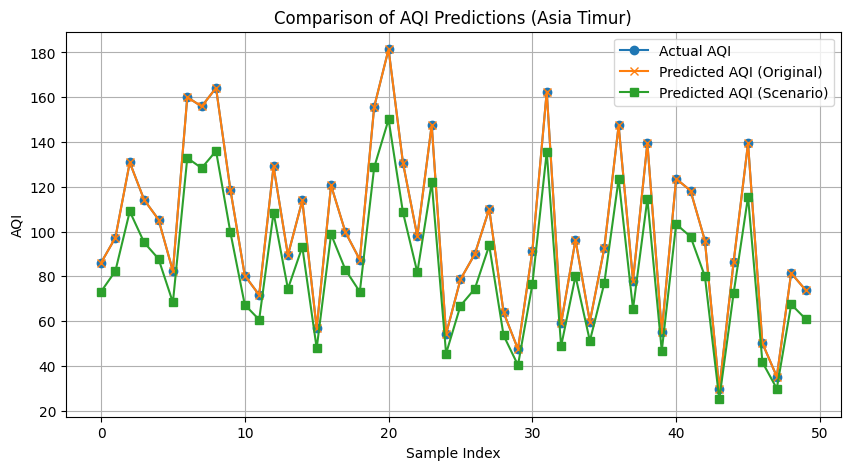

In [ ]:
# Visualisasi untuk Asia Tenggara
plt.figure(figsize=(10, 5))
plt.plot(tenggara_comparison['Actual AQI'].values[:50], label='Actual AQI', marker='o')
plt.plot(tenggara_comparison['Predicted AQI (Original)'].values[:50], label='Predicted AQI (Original)', marker='x')
plt.plot(tenggara_comparison['Predicted AQI (Scenario)'].values[:50], label='Predicted AQI (Scenario)', marker='s')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Comparison of AQI Predictions (Asia Tenggara)')
plt.legend()
plt.grid()
plt.show()

# Visualisasi untuk Asia Timur
plt.figure(figsize=(10, 5))
plt.plot(timur_comparison['Actual AQI'].values[:50], label='Actual AQI', marker='o')
plt.plot(timur_comparison['Predicted AQI (Original)'].values[:50], label='Predicted AQI (Original)', marker='x')
plt.plot(timur_comparison['Predicted AQI (Scenario)'].values[:50], label='Predicted AQI (Scenario)', marker='s')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Comparison of AQI Predictions (Asia Timur)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Asia Tenggara
reduction_tenggara = tenggara_comparison['Predicted AQI (Original)'].mean() - tenggara_comparison['Predicted AQI (Scenario)'].mean()
print(f"Rata-rata penurunan AQI di Asia Tenggara: {reduction_tenggara:.2f}")

# Asia Timur
reduction_timur = timur_comparison['Predicted AQI (Original)'].mean() - timur_comparison['Predicted AQI (Scenario)'].mean()
print(f"Rata-rata penurunan AQI di Asia Timur: {reduction_timur:.2f}")

Rata-rata penurunan AQI di Asia Tenggara: 16.57
Rata-rata penurunan AQI di Asia Timur: 16.72


# Terima Kasih